# PERFORMATCH

Equipo 14. Entrega Final

Claudio Ignacio Astudillo Lazárate

José Patricio Díaz Gálvez

Fernando Ignacio Riveros Esparza

*Estudiantes de Ingeniería Civil Industrial, de la Pontificia Universidad Católica de Valparaíso, Chile.*

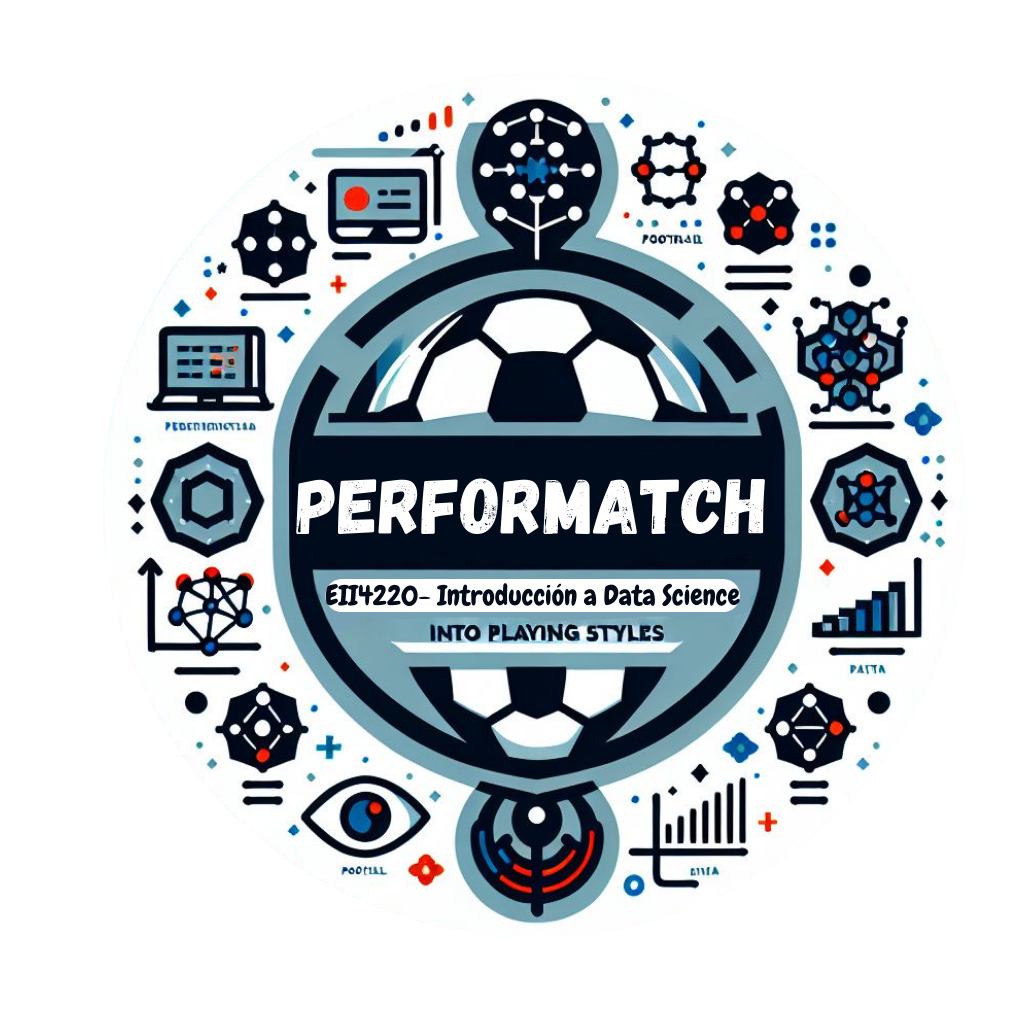

Cada seis meses se llevan a cabo transacciones por fichajes de jugadores en las principales ligas
de fútbol del mundo. Una de las más importantes corresponde a la liga inglesa, la reconocida y
prestigiosa: Premier League.

Según datos de la plataforma Inside World Football, en la temporada 2023/2024 se invirtieron
alrededor de 9,63 mil millones de dólares en fichajes de jugadores, de los cuales 2,96 mil
millones corresponden exclusivamente a clubes ingleses, lo que representa aproximadamente un
tercio del mercado global. Estos altos costos reflejan la relevancia de que los fichajes no sean
sólo una transacción, sino una inversión estratégica a mediano y largo plazo que debería
alinearse a los objetivos del club. Respecto a los jugadores, en la Premier League en la
temporada 2023/2024 compitieron un total de 580 futbolistas con diferentes cualidades (FBREF,
2024). Por esto, la selección de estos se vuelve un proceso complicado y caótico, por lo que debe
basarse en un análisis riguroso y detallado. No basta con fichar a “los mejores”, sino que se trata
de escoger al jugador que con su perfil y características específicas se adecue mejor con el
equipo a modo de potenciar y explotar las cualidades específicas de todos los integrantes del
club.

Por otro lado, existe una tendencia marcada a preferir futbolistas de determinadas nacionalidades
debido a un “estándar de calidad” históricamente asociado con países como Argentina, Brasil e
Inglaterra. Esta percepción, alimentada tanto por la trayectoria deportiva como por la reputación
de sus jugadores, se ve reforzada por el impacto del marketing de marcas deportivas, que
promueven la idea de que ciertos jugadores tienen una calidad superior. Como resultado, en
muchas ocasiones, se termina eligiendo al jugador con mayor proyección comercial, para ser
vendido posteriormente, en lugar del más adecuado para las necesidades estratégicas del equipo
(Soccereconomics, 2014).

Por todo lo anterior, los directivos de los clubes de la Premier League encargados del proceso de
fichaje de futbolistas evidencian dificultad para seleccionar a los jugadores adecuados para
aumentar el rendimiento del equipo porque no realizan un estudio de mercado alineado a sus
objetivos de forma estratégica y sus esfuerzos por separar el componente comercial del
rendimiento en el deporte son insuficientes.

Para la realización del proyecto, proponemos desarrollar una aplicación de análisis y clustering
que ayude a los directivos y cuerpo técnico de los clubes de la Premier League durante los
periodos de fichajes. Para esto, le pediremos al usuario que seleccione la posición (portero,
defensa, mediocentro o delantero) y el estilo de juego (creador, goleador, defensor, etc...).
Posterior a esto, la aplicación ejecutará un algoritmo que implemente Hierarchical Clustering
basado en los atributos relevantes para el estilo de juego seleccionado. Finalmente, la aplicaciónmostrará el clúster con los jugadores que cumplen los criterios brindados, facilitando así al club
seleccionar al jugador que consideren más indicado a sus necesidades.

En este trabajo, nos enfocaremos en aprender a identificar y aplicar conceptos clave de Data
Science, construyendo tablas de datos estructuradas a través de procesos de extracción y
transformación. También analizaremos y exploraremos diversas técnicas de Data Science con el
objetivo de tomar decisiones basadas en datos. Estos objetivos tienen como propósito reforzar la
capacidad para identificar problemas y diseñar soluciones basadas en datos, con la finalidad de
afinar nuestros criterios de toma de decisiones en el futuro desplante profesional como
Ingenieros Civiles Industriales.

**La Base de Datos**

El dataset final fue creado a partir de varias bases de datos obtenidas de “FBREF” (Liga Premier League, temporada 2023-2024), seleccionadas
con el objetivo de aportar profundidad y completitud al análisis de los distintos estilos de juego
que se quieren modelar, considerando las diferentes posiciones en el campo de juego (delanteros,
mediocampistas y defensas, pero excluyendo a los arqueros). Entre estas bases de datos se
integraron categorías como Estadísticas Estándar, Creación de Goles y Tiros, Posesión de Balón,
Tipos de Pase, Tiros, Pases, Acciones Defensivas y otras estadísticas diversas. Este proceso de
unificación permitió obtener un panorama integral del rendimiento de los jugadores.

#Limpieza y Analisis de Base de Datos

Primeramente, se realizará el Pre-Proccesing de los datos, el cual conlleva en una primera parte, la limpieza de la Base de Datos, de aquellos que pueden estar mal referenciados, o aquellos que se encuentran fuera de lo que el tipo de valor debe equivaler.

Luego de realizar esto, en una segunda parte se analizarán los datos limpiados, a través de variedades de gráficos y demás.

## Basic Loads
Importación de librerias.

In [3]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt
from google.colab import files

In [4]:
upload = files.upload()
PerforMatch = pd.read_csv('PerforMatch_BD.csv')

Saving PerforMatch_BD.csv to PerforMatch_BD.csv


In [5]:
#Mostramos lo principal de la BD.
PerforMatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RL                456 non-null    int64  
 1   Jugador           456 non-null    object 
 2   País              456 non-null    object 
 3   Posc              456 non-null    object 
 4   Posc 2            456 non-null    object 
 5   Equipo            456 non-null    object 
 6   Edad              456 non-null    int64  
 7   Rango Etario      456 non-null    object 
 8   Minutos           456 non-null    int64  
 9   PenEjec           456 non-null    int64  
 10  Goles/90          456 non-null    float64
 11  Ast/90            456 non-null    float64
 12  G+a/90            456 non-null    float64
 13  ACT.ACT           456 non-null    int64  
 14  ACT.SCA90         456 non-null    float64
 15  PassLive          456 non-null    int64  
 16  PassDead          456 non-null    int64  
 1

##PreProcessing
Se descartarán a los jugadores que tienen menos de 90 minutos jugados. Ademas, se eliminaran algunas columnas que no seran utilizadas.

In [8]:
#Eliminamos los jugadores que han jugado menos de 90 minutos
PerforMatch= PerforMatch[PerforMatch['Minutos']>90]

#Eliminamos los porteros, quienes no serán considerados para nuestro agrupamiento

# Filtrar las filas donde ni 'Posc' ni 'Posc2' sean 'PO'
PerforMatch = PerforMatch[(PerforMatch['Posc'] != 'PO') & (PerforMatch['Posc 2'] != 'PO')]
PerforMatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RL                456 non-null    int64  
 1   Jugador           456 non-null    object 
 2   País              456 non-null    object 
 3   Posc              456 non-null    object 
 4   Posc 2            456 non-null    object 
 5   Equipo            456 non-null    object 
 6   Edad              456 non-null    int64  
 7   Rango Etario      456 non-null    object 
 8   Minutos           456 non-null    int64  
 9   PenEjec           456 non-null    int64  
 10  Goles/90          456 non-null    float64
 11  Ast/90            456 non-null    float64
 12  G+a/90            456 non-null    float64
 13  ACT.ACT           456 non-null    int64  
 14  ACT.SCA90         456 non-null    float64
 15  PassLive          456 non-null    int64  
 16  PassDead          456 non-null    int64  
 1

Nos quedan 456 jugadores

In [9]:
PerforMatch_Numbers=PerforMatch.drop(['RL','Jugador','País','Posc','Posc 2','Equipo','Edad','Rango Etario','Minutos'],axis=1)
PerforMatch_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PenEjec           456 non-null    int64  
 1   Goles/90          456 non-null    float64
 2   Ast/90            456 non-null    float64
 3   G+a/90            456 non-null    float64
 4   ACT.ACT           456 non-null    int64  
 5   ACT.SCA90         456 non-null    float64
 6   PassLive          456 non-null    int64  
 7   PassDead          456 non-null    int64  
 8   HASTA             456 non-null    int64  
 9   TiroalTiro        456 non-null    int64  
 10  FaltRecib         456 non-null    int64  
 11  ACG.ACG           456 non-null    int64  
 12  ACG.GCA90         456 non-null    float64
 13  Toques            456 non-null    int64  
 14  3. Ataq           456 non-null    int64  
 15  Ataq.Pen          456 non-null    int64  
 16  Ataq.Pen.PORC     456 non-null    float64
 1

##Estadística Descriptiva


En esta sección se analizan los datos, desde la estadística descriptiva, familiarizándose con la información a trabajar

In [10]:
PerforMatch_Numbers.describe().T

count         mean          std    min       25%       50%  \
PenEjec           456.0     0.210526     0.874284   0.00     0.000     0.000   
Goles/90          456.0     0.149561     0.195960   0.00     0.000     0.080   
Ast/90            456.0     0.107610     0.140211   0.00     0.000     0.060   
G+a/90            456.0     0.257083     0.266724   0.00     0.050     0.180   
ACT.ACT           456.0    40.094298    37.811067   0.00    13.000    27.000   
ACT.SCA90         456.0     2.406601     1.398572   0.00     1.360     2.220   
PassLive          456.0    29.368421    27.033642   0.00    10.000    21.000   
PassDead          456.0     3.289474     7.904344   0.00     0.000     0.000   
HASTA             456.0     2.344298     3.499747   0.00     0.000     1.000   
TiroalTiro        456.0     2.622807     2.982411   0.00     0.000     2.000   
FaltRecib         456.0     1.684211     2.306477   0.00     0.000     1.000   
ACG.ACG           456.0     4.495614     5.028270   0.00     1.000     3.000   
ACG.GCA90         456.0     0.267456     0.269033   0.00     0.080     0.200   
Toques            456.0   970.929825   726.932849  39.00   388.000   813.000   
3. Ataq           456.0   263.304825   238.305901   2.00    82.250   190.000   
Ataq.Pen          456.0    43.502193    47.815028   0.00    11.000    27.000   
Ataq.Pen.PORC     456.0     0.058355     0.055535   0.00     0.020     0.030   
3.Ataq.PORC       456.0     0.310899     0.177401   0.01     0.170     0.295   
Tomas.Balónvivo   456.0   970.695175   726.815987  39.00   388.000   813.000   
Att               456.0    30.978070    33.155504   0.00     8.000    20.000   
Exitosa.PORC      456.0    45.005263    18.725479   0.00    35.775    45.550   
Dist. tot.        456.0  2932.875000  2317.877394  81.00  1038.000  2340.000   
Dist. Prg         456.0  1491.429825  1273.444941  22.00   481.500  1147.000   
Rec               456.0   645.116228   517.691895  18.00   245.000   531.000   
PrgR              456.0    63.412281    71.966666   0.00    12.750    35.500   
TiPas.Balónvivo   456.0   723.833333   595.479704  18.00   256.250   568.500   
PL                456.0     2.896930     4.658009   0.00     0.000     1.000   
Camb              456.0     4.265351     6.103303   0.00     0.000     2.000   
PA                456.0     2.910088     3.138318   0.00     1.000     2.000   
Bloqueos          456.0    15.866228    13.152432   0.00     6.000    13.000   
Goles             456.0     2.620614     3.902483   0.00     0.000     1.000   
Disp              456.0    22.682018    23.199512   0.00     6.000    14.000   
PORC de TT        456.0    30.430702    19.146202   0.00    20.000    31.300   
TalArc/90         456.0     0.483421     0.471798   0.00     0.130     0.330   
G/T               456.0     0.090724     0.110223   0.00     0.000     0.070   
DistDisp          456.0    15.946711     5.580834   0.00    12.500    16.100   
Cmp               456.0   640.633772   560.730461  19.00   217.750   490.000   
Total.Intent      456.0   787.421053   643.084034  22.00   281.500   626.000   
Total.Cmp.PORC    456.0    78.707018     7.943932  52.70    73.575    78.950   
Cortos.Cmp        456.0   319.087719   267.796833  12.00   117.000   257.500   
Cortos.Intent     456.0   358.197368   286.523467  13.00   138.750   299.000   
Cortos.Cmp.PORC   456.0    87.125877     6.301825  58.90    84.475    87.850   
Derribos.Tkl      456.0    29.267544    23.489318   0.00    11.000    23.500   
Derribos.TklG     456.0    17.190789    14.052523   0.00     6.000    14.000   
Desafio.Tkl       456.0    13.574561    12.063884   0.00     5.000    11.000   
Desafio.Tkl.PORC  456.0    47.388816    18.877002   0.00    36.075    48.050   
Bloqueos.1        456.0    20.267544    14.972896   0.00     8.750    17.500   
Tkl+Int           456.0    43.039474    34.331586   0.00    16.000    35.000   
Penal concedido   456.0     0.210526     0.463597   0.00     0.000     0.000   
Recup.            

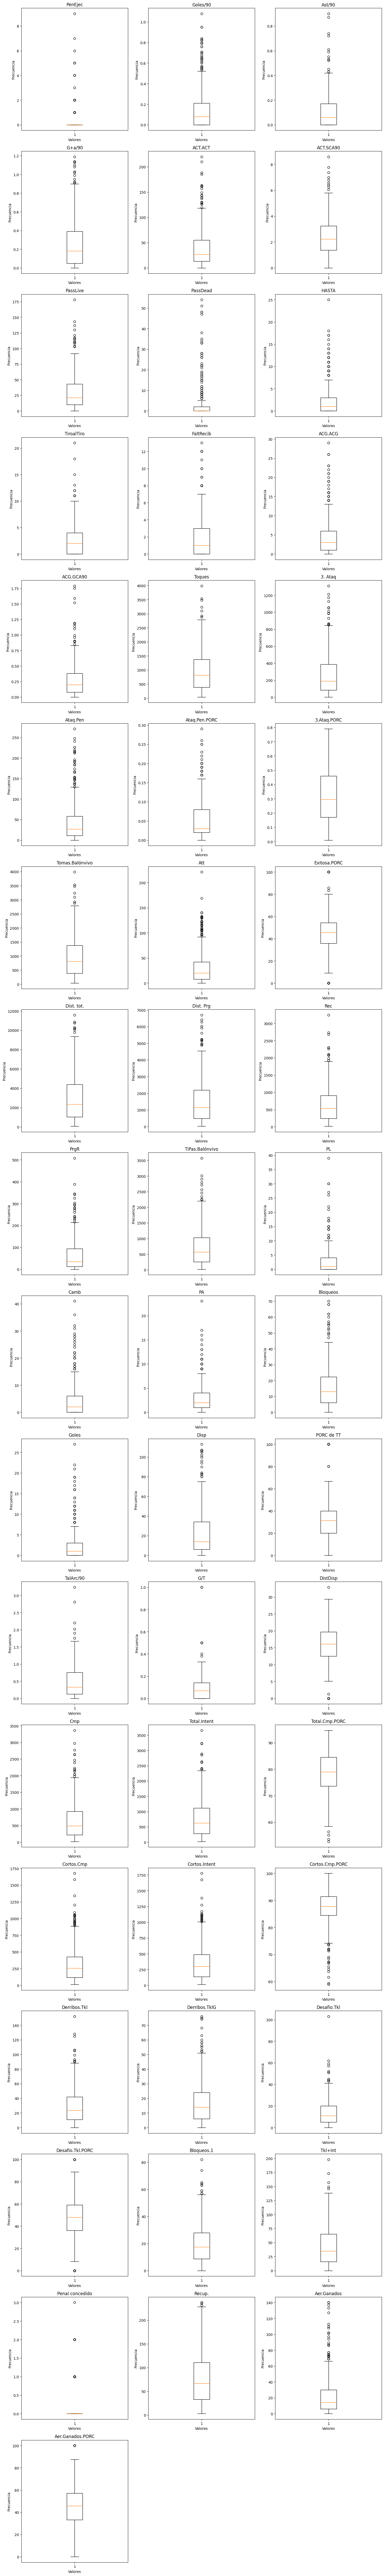

In [11]:
plt.figure(figsize=(15, 100))

for i, column in enumerate(PerforMatch_Numbers.columns):
    plt.subplot(len(PerforMatch_Numbers.columns)//3 + 1, 3, i + 1)
    plt.boxplot(PerforMatch_Numbers[column].dropna())  # Eliminar NaN si es necesario
    plt.title(column)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se puede apreciar gran cantidad de outliers.

A continuación en el código, se estandarizan los datos para su comparación.

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
X = PerforMatch_Numbers
Y = PerforMatch['Posc']
# Fit and transform the data
scaled_features = scaler.fit_transform(X)

# Create a DataFrame for the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)
scaled_df['Posc'] = Y.values

# Display summary statistics
print("Standardized Data Summary:")
scaled_df.describe().T

Standardized Data Summary:


count          mean       std       min       25%       50%  \
PenEjec           456.0  5.843279e-17  1.001098 -0.241063 -0.241063 -0.241063   
Goles/90          456.0  5.161563e-17  1.001098 -0.764063 -0.764063 -0.355368   
Ast/90            456.0 -7.401487e-17  1.001098 -0.768327 -0.768327 -0.339930   
G+a/90            456.0  9.738798e-18  1.001098 -0.964915 -0.777249 -0.289318   
ACT.ACT           456.0  5.064175e-17  1.001098 -1.061550 -0.717358 -0.346689   
ACT.SCA90         456.0  8.570143e-17  1.001098 -1.722646 -0.749157 -0.133569   
PassLive          456.0  1.168656e-17  1.001098 -1.087559 -0.717243 -0.309896   
PassDead          456.0  7.791039e-18  1.001098 -0.416617 -0.416617 -0.416617   
HASTA             456.0 -1.558208e-17  1.001098 -0.670584 -0.670584 -0.384535   
TiroalTiro        456.0  3.895519e-17  1.001098 -0.880391 -0.880391 -0.209056   
FaltRecib         456.0  3.505967e-17  1.001098 -0.731011 -0.731011 -0.296973   
ACG.ACG           456.0  4.090295e-17  1.001098 -0.895050 -0.695956 -0.297768   
ACG.GCA90         456.0  8.375367e-17  1.001098 -0.995232 -0.697544 -0.251011   
Toques            456.0 -1.168656e-17  1.001098 -1.283411 -0.802784 -0.217494   
3. Ataq           456.0 -3.895519e-18  1.001098 -1.097714 -0.760592 -0.307946   
Ataq.Pen          456.0  5.648503e-17  1.001098 -0.910801 -0.680495 -0.345505   
Ataq.Pen.PORC     456.0 -7.596263e-17  1.001098 -1.051943 -0.691413 -0.511147   
3.Ataq.PORC       456.0  3.603355e-16  1.001098 -1.698017 -0.795114 -0.089721   
Tomas.Balónvivo   456.0  9.738798e-18  1.001098 -1.283294 -0.802590 -0.217205   
Att               456.0  7.791039e-18  1.001098 -0.935353 -0.693801 -0.331472   
Exitosa.PORC      456.0 -7.304099e-17  1.001098 -2.406063 -0.493467  0.029123   
Dist. tot.        456.0  7.791039e-18  1.001098 -1.231733 -0.818402 -0.256065   
Dist. Prg         456.0 -7.011935e-17  1.001098 -1.155169 -0.793940 -0.270768   
Rec               456.0 -2.726864e-17  1.001098 -1.212700 -0.773734 -0.220675   
PrgR              456.0  3.019028e-17  1.001098 -0.882102 -0.704742 -0.388276   
TiPas.Balónvivo   456.0 -7.985815e-17  1.001098 -1.186621 -0.786084 -0.261141   
PL                456.0 -4.479847e-17  1.001098 -0.622608 -0.622608 -0.407688   
Camb              456.0 -1.022574e-16  1.001098 -0.699627 -0.699627 -0.371576   
PA                456.0 -1.947760e-17  1.001098 -0.928295 -0.609303 -0.290311   
Bloqueos          456.0  1.363432e-17  1.001098 -1.207659 -0.750969 -0.218163   
Goles             456.0  2.921640e-17  1.001098 -0.672262 -0.672262 -0.415734   
Disp              456.0 -5.843279e-17  1.001098 -0.978768 -0.719857 -0.374644   
PORC de TT        456.0 -1.597163e-16  1.001098 -1.591131 -0.545391  0.045453   
TalArc/90         456.0  4.285071e-17  1.001098 -1.025761 -0.749916 -0.325541   
G/T               456.0 -1.636118e-16  1.001098 -0.823995 -0.823995 -0.188222   
DistDisp          456.0  1.597163e-16  1.001098 -2.860545 -0.618276  0.027497   
Cmp               456.0  4.869399e-17  1.001098 -1.109832 -0.754994 -0.268934   
Total.Intent      456.0 -1.558208e-17  1.001098 -1.191542 -0.787575 -0.251287   
Total.Cmp.PORC    456.0 -4.285071e-17  1.001098 -3.277417 -0.646739  0.030621   
Cortos.Cmp        456.0  7.791039e-17  1.001098 -1.147978 -0.755460 -0.230232   
Cortos.Intent     456.0 -1.051790e-16  1.001098 -1.206102 -0.766738 -0.206833   
Cortos.Cmp.PORC   456.0 -2.532088e-16  1.001098 -4.483920 -0.421114  0.115033   
Derribos.Tkl      456.0 -2.045148e-17  1.001098 -1.247362 -0.778550 -0.245809   
Derribos.TklG     456.0  1.343954e-16  1.001098 -1.224668 -0.797229 -0.227311   
Desafio.Tkl       456.0 -5.453727e-17  1.001098 -1.126459 -0.711544 -0.213645   
Desafio.Tkl.PORC  456.0  1.129701e-16  1.001098 -2.513157 -0.600002  0.035064   
Bloqueos.1        456.0 -3.505967e-17  1.001098 -1.355102 -0.770071 -0.185040   
Tkl+Int           456.0 -2.337312e-17  1.001098 -1.255018 -0.788463 -0.234429   
Penal concedido   456.0 -3.603355e-17  1.001098 -

##Exploración de Datos (EDA)
En este apartado, separamos las bases de datos por Tipo de Estadística

Se subdividirán las bases de datos para, posteriormente, realizar un análisis exploratorio mediante las metodologías Heatmap y PCA.

array([[<Axes: title={'center': 'PenEjec'}>,
        <Axes: title={'center': 'Goles/90'}>,
        <Axes: title={'center': 'Ast/90'}>,
        <Axes: title={'center': 'G+a/90'}>,
        <Axes: title={'center': 'ACT.ACT'}>,
        <Axes: title={'center': 'ACT.SCA90'}>,
        <Axes: title={'center': 'PassLive'}>],
       [<Axes: title={'center': 'PassDead'}>,
        <Axes: title={'center': 'HASTA'}>,
        <Axes: title={'center': 'TiroalTiro'}>,
        <Axes: title={'center': 'FaltRecib'}>,
        <Axes: title={'center': 'ACG.ACG'}>,
        <Axes: title={'center': 'ACG.GCA90'}>,
        <Axes: title={'center': 'Toques'}>],
       [<Axes: title={'center': '3. Ataq'}>,
        <Axes: title={'center': 'Ataq.Pen'}>,
        <Axes: title={'center': 'Ataq.Pen.PORC'}>,
        <Axes: title={'center': '3.Ataq.PORC'}>,
        <Axes: title={'center': 'Tomas.Balónvivo'}>,
        <Axes: title={'center': 'Att'}>,
        <Axes: title={'center': 'Exitosa.PORC'}>],
       [<Axes: title={'ce

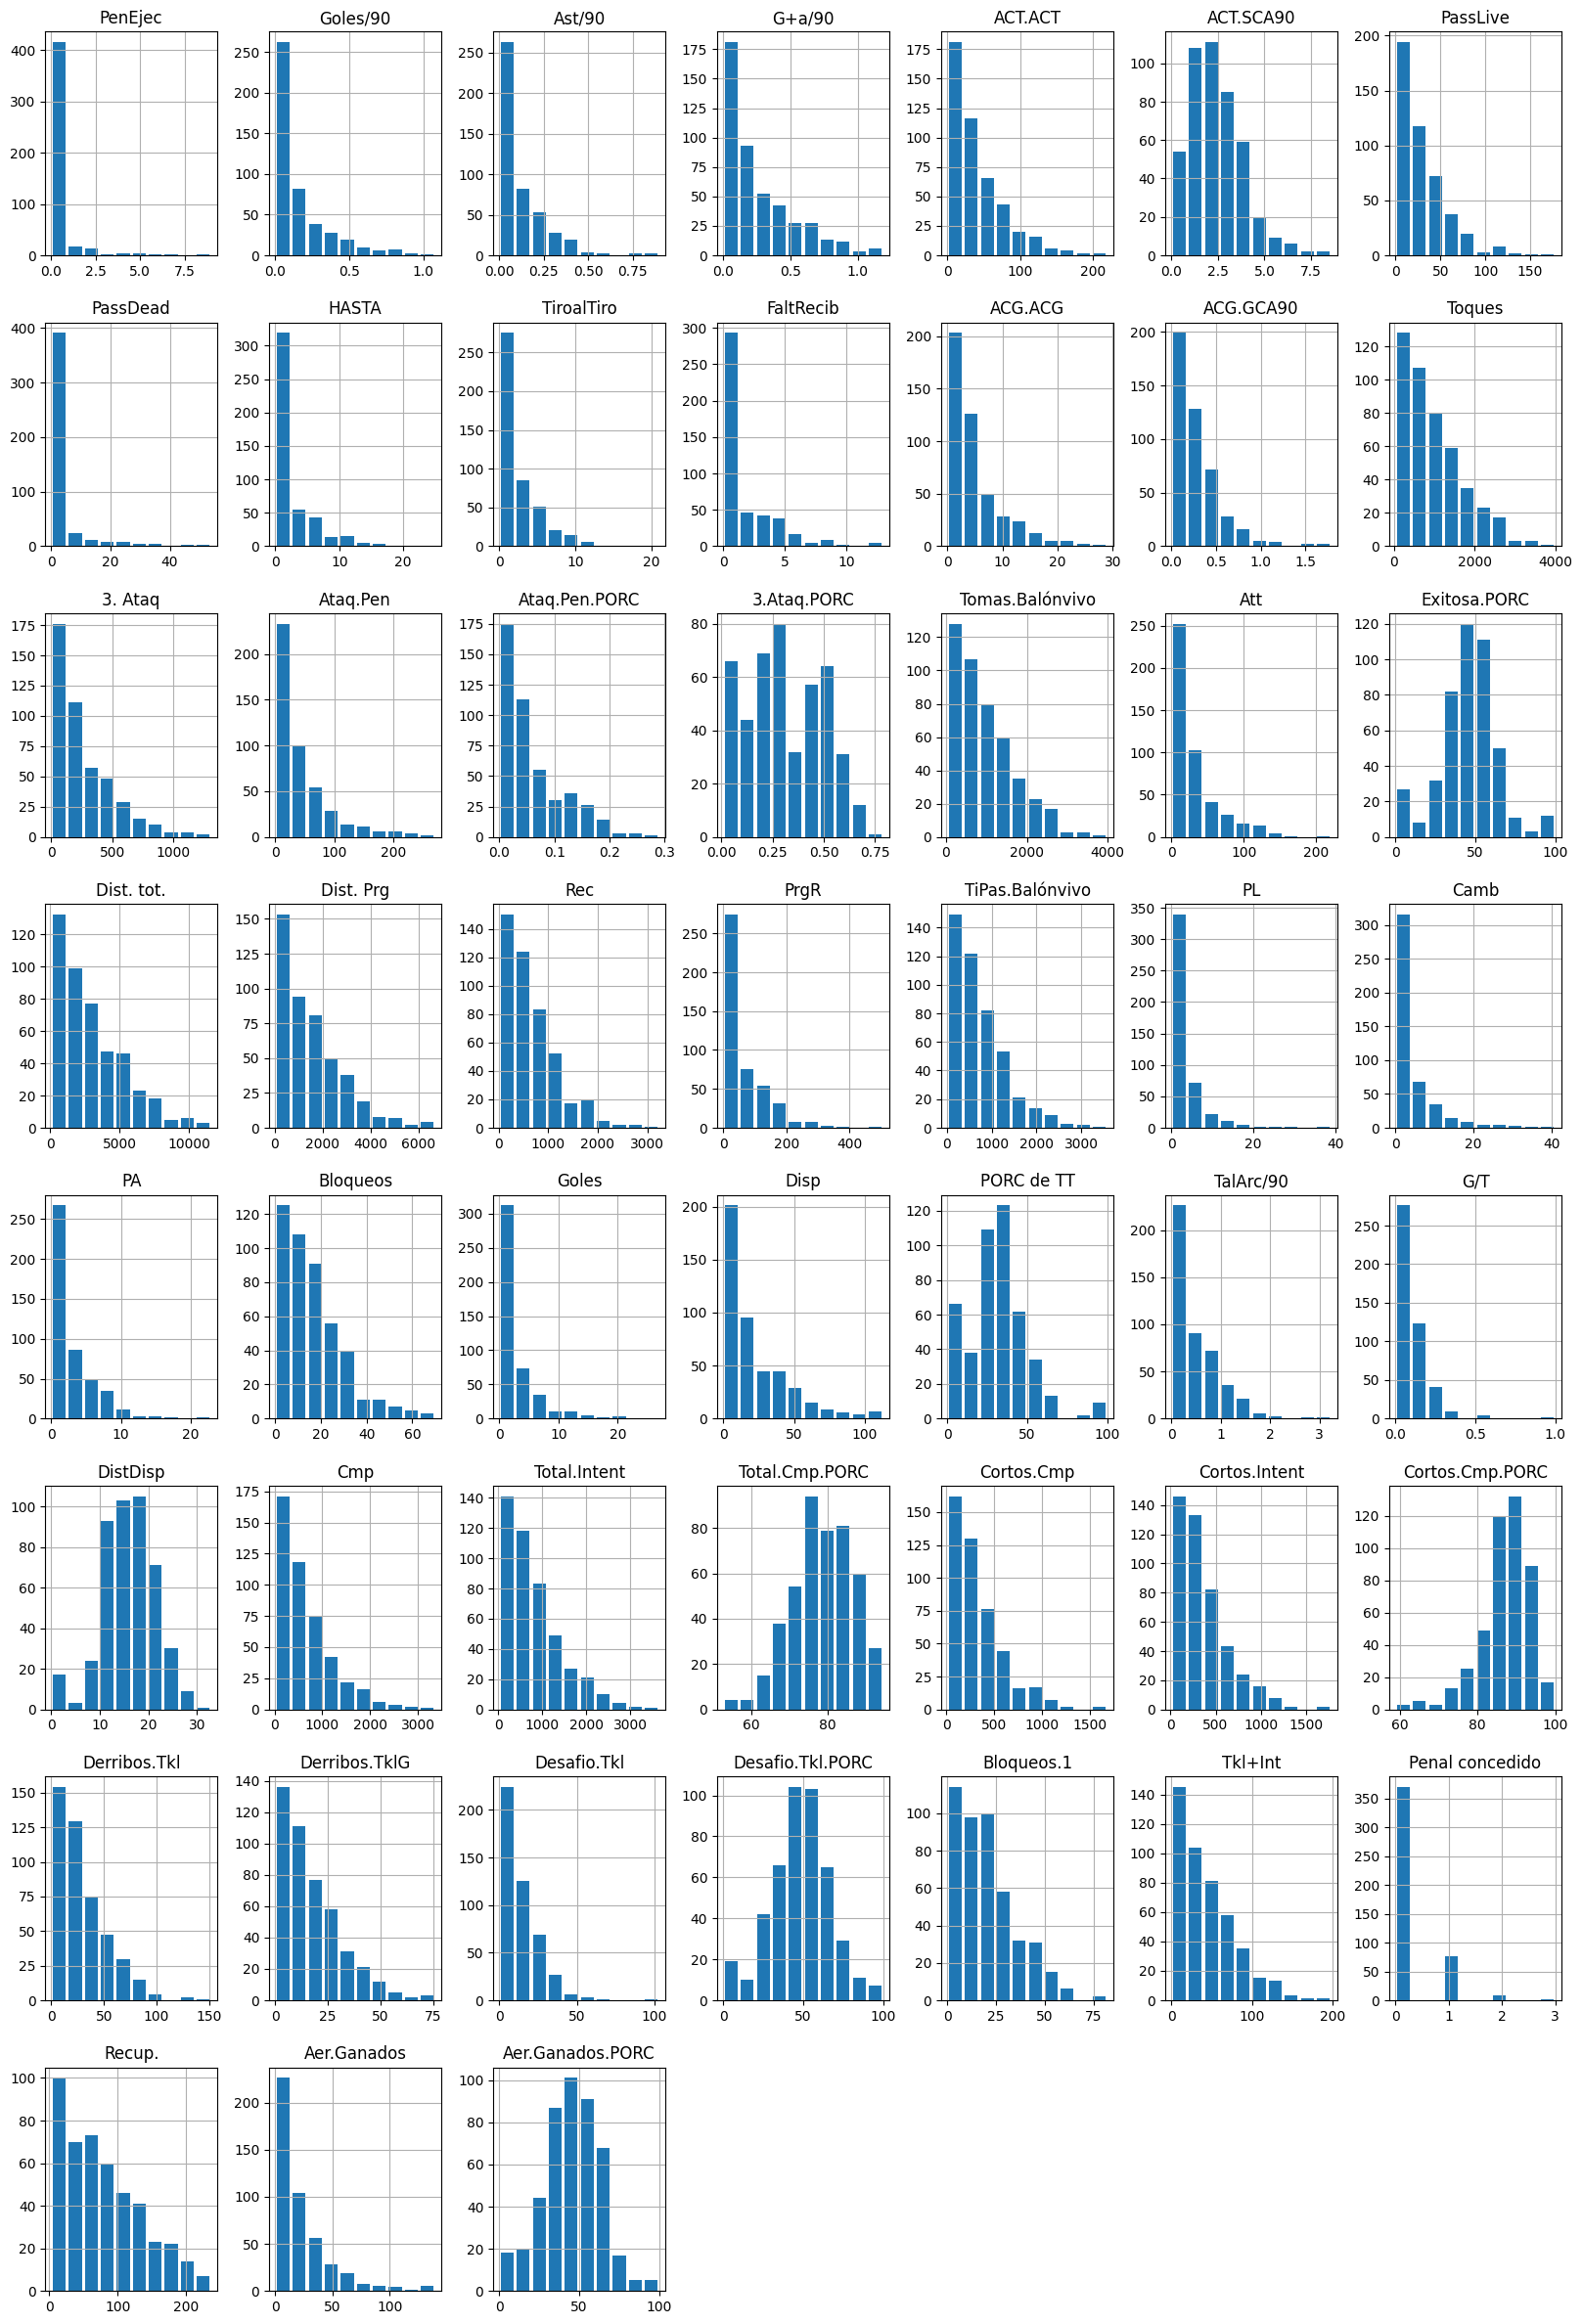

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
PerforMatch_Numbers.hist(figsize=(20,30),rwidth=0.8)

###SubDivisión de Bases de Datos
Los repositorios de datos serán trabajados por separados, para intentar minimizar la cantidad de atributos, abarcando la mayor cantidad de información posible (priorizando no caer en 'overfitting').

Estos corresponden a: EstEst, CreaGolTir, PosBal, TipBas, Tir, Pas y AccDef.

In [14]:
selected_columns = ['PenEjec', 'Goles/90', 'Ast/90', 'G+a/90']
PerforMatch_EstEst = PerforMatch_Numbers[selected_columns]
PerforMatch_EstEst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PenEjec   456 non-null    int64  
 1   Goles/90  456 non-null    float64
 2   Ast/90    456 non-null    float64
 3   G+a/90    456 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 14.4 KB


In [15]:
selected_columns = ['ACT.ACT', 'ACT.SCA90', 'PassLive', 'PassDead','HASTA','TiroalTiro','FaltRecib','ACG.ACG','ACG.GCA90']
PerforMatch_CreaGolTir = PerforMatch_Numbers[selected_columns]
PerforMatch_CreaGolTir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ACT.ACT     456 non-null    int64  
 1   ACT.SCA90   456 non-null    float64
 2   PassLive    456 non-null    int64  
 3   PassDead    456 non-null    int64  
 4   HASTA       456 non-null    int64  
 5   TiroalTiro  456 non-null    int64  
 6   FaltRecib   456 non-null    int64  
 7   ACG.ACG     456 non-null    int64  
 8   ACG.GCA90   456 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 32.2 KB


In [16]:
selected_columns = ['Toques', '3. Ataq', 'Ataq.Pen', 'Ataq.Pen.PORC','3.Ataq.PORC','Tomas.Balónvivo','Att','Exitosa.PORC','Dist. tot.','Dist. Prg','Rec','PrgR']
PerforMatch_PosBal = PerforMatch_Numbers[selected_columns]
PerforMatch_PosBal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Toques           456 non-null    int64  
 1   3. Ataq          456 non-null    int64  
 2   Ataq.Pen         456 non-null    int64  
 3   Ataq.Pen.PORC    456 non-null    float64
 4   3.Ataq.PORC      456 non-null    float64
 5   Tomas.Balónvivo  456 non-null    int64  
 6   Att              456 non-null    int64  
 7   Exitosa.PORC     456 non-null    float64
 8   Dist. tot.       456 non-null    int64  
 9   Dist. Prg        456 non-null    int64  
 10  Rec              456 non-null    int64  
 11  PrgR             456 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 42.9 KB


In [17]:
selected_columns = ['TiPas.Balónvivo', 'PL', 'Camb', 'PA','Bloqueos']
PerforMatch_TipPas = PerforMatch_Numbers[selected_columns]
PerforMatch_TipPas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TiPas.Balónvivo  456 non-null    int64
 1   PL               456 non-null    int64
 2   Camb             456 non-null    int64
 3   PA               456 non-null    int64
 4   Bloqueos         456 non-null    int64
dtypes: int64(5)
memory usage: 17.9 KB


In [18]:
selected_columns = ['Goles','Disp','PORC de TT','TalArc/90','G/T','DistDisp']
PerforMatch_Tir = PerforMatch_Numbers[selected_columns]
PerforMatch_Tir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Goles       456 non-null    int64  
 1   Disp        456 non-null    int64  
 2   PORC de TT  456 non-null    float64
 3   TalArc/90   456 non-null    float64
 4   G/T         456 non-null    float64
 5   DistDisp    456 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 21.5 KB


In [19]:
selected_columns = ['Cmp','Total.Intent','Total.Cmp.PORC','Cortos.Cmp','Cortos.Intent','Cortos.Cmp.PORC']
PerforMatch_Pas = PerforMatch_Numbers[selected_columns]
PerforMatch_Pas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cmp              456 non-null    int64  
 1   Total.Intent     456 non-null    int64  
 2   Total.Cmp.PORC   456 non-null    float64
 3   Cortos.Cmp       456 non-null    int64  
 4   Cortos.Intent    456 non-null    int64  
 5   Cortos.Cmp.PORC  456 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 21.5 KB


In [20]:
selected_columns = ['Derribos.Tkl','Derribos.TklG','Desafio.Tkl','Desafio.Tkl.PORC','Bloqueos.1','Tkl+Int']
PerforMatch_AccDef = PerforMatch_Numbers[selected_columns]
PerforMatch_AccDef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Derribos.Tkl      456 non-null    int64  
 1   Derribos.TklG     456 non-null    int64  
 2   Desafio.Tkl       456 non-null    int64  
 3   Desafio.Tkl.PORC  456 non-null    float64
 4   Bloqueos.1        456 non-null    int64  
 5   Tkl+Int           456 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 21.5 KB


In [21]:
#No realizaremos HeatMap ni PCA con este Subtipo de Base de Datos
selected_columns = ['Penal concedido','Recup.','Aer.Ganados','Aer.Ganados.PORC']
PerforMatch_EstDiv = PerforMatch_Numbers[selected_columns]
PerforMatch_EstDiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Penal concedido   456 non-null    int64  
 1   Recup.            456 non-null    int64  
 2   Aer.Ganados       456 non-null    int64  
 3   Aer.Ganados.PORC  456 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 14.4 KB


###HeatMaps

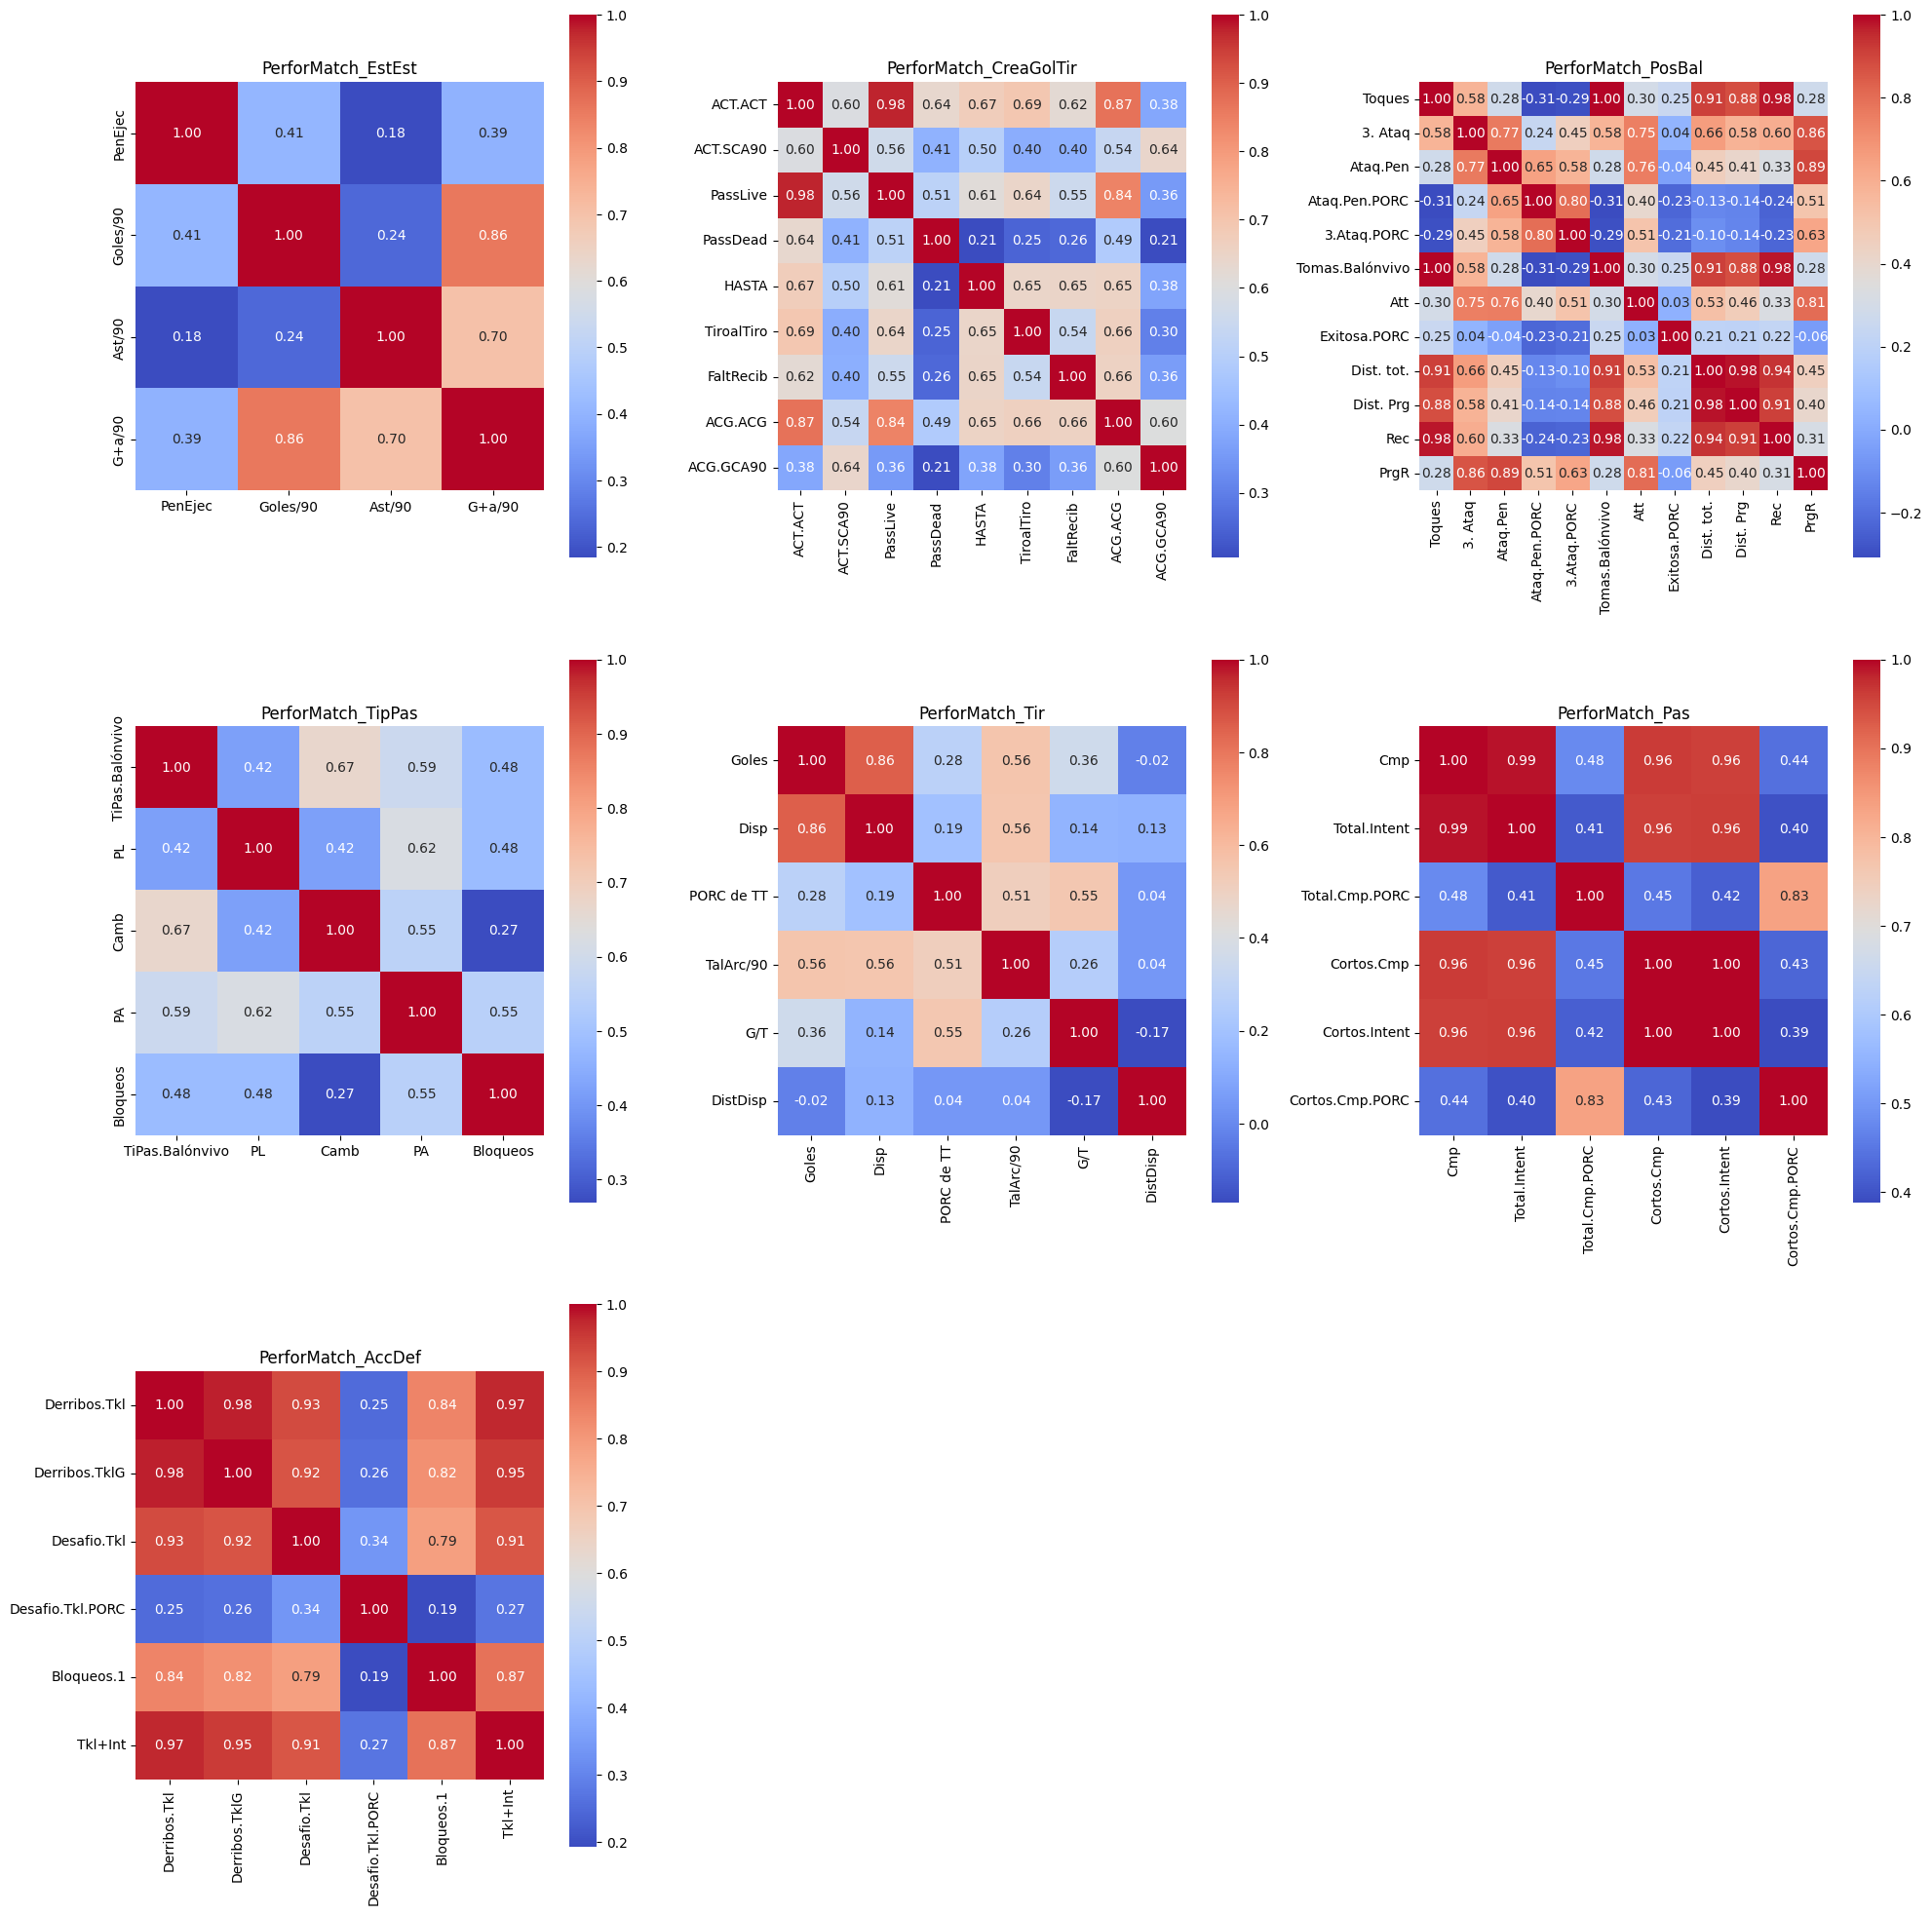

In [22]:
dataframes = [
    PerforMatch_EstEst,
    PerforMatch_CreaGolTir,
    PerforMatch_PosBal,
    PerforMatch_TipPas,
    PerforMatch_Tir,
    PerforMatch_Pas,
    PerforMatch_AccDef
]

# Nombres de los DataFrames correspondientes
df_names = [
    'PerforMatch_EstEst',
    'PerforMatch_CreaGolTir',
    'PerforMatch_PosBal',
    'PerforMatch_TipPas',
    'PerforMatch_Tir',
    'PerforMatch_Pas',
    'PerforMatch_AccDef'
]

# Establecer el tamaño de la figura
plt.figure(figsize=(20, 20))

# Iterar sobre los DataFrames y crear un heatmap para cada uno
for i, df in enumerate(dataframes):
    plt.subplot(3, 3, i + 1)  # Ajusta el número de filas y columnas según sea necesario
    corr = df.corr()  # Calcular la matriz de correlación
    sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar=True)
    plt.title(df_names[i])  # Cambia el título al nombre del DataFrame correspondiente

plt.tight_layout()
plt.show()

Index(['ACT.ACT', 'ACT.SCA90', 'PassLive', 'PassDead', 'HASTA', 'TiroalTiro',
       'FaltRecib', 'ACG.ACG', 'ACG.GCA90'],
      dtype='object')


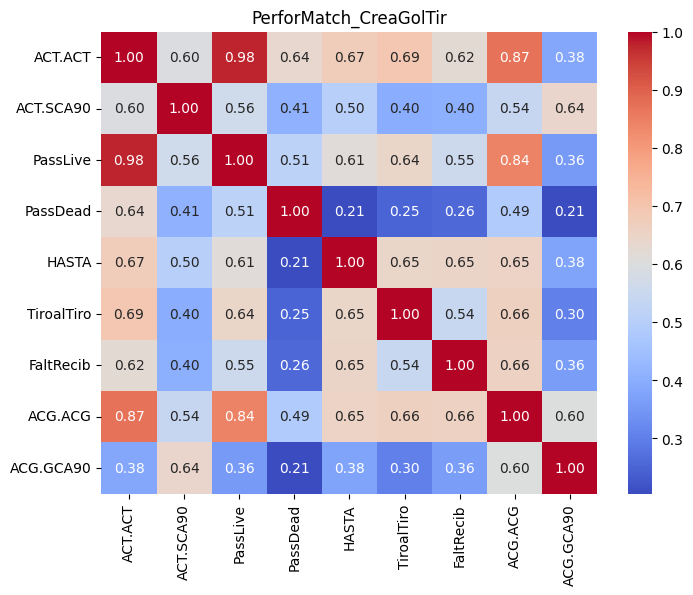

In [23]:
print(PerforMatch_CreaGolTir.columns)

correlation_matrix = PerforMatch_CreaGolTir.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PerforMatch_CreaGolTir')
plt.show()

Index(['Toques', '3. Ataq', 'Ataq.Pen', 'Ataq.Pen.PORC', '3.Ataq.PORC',
       'Tomas.Balónvivo', 'Att', 'Exitosa.PORC', 'Dist. tot.', 'Dist. Prg',
       'Rec', 'PrgR'],
      dtype='object')


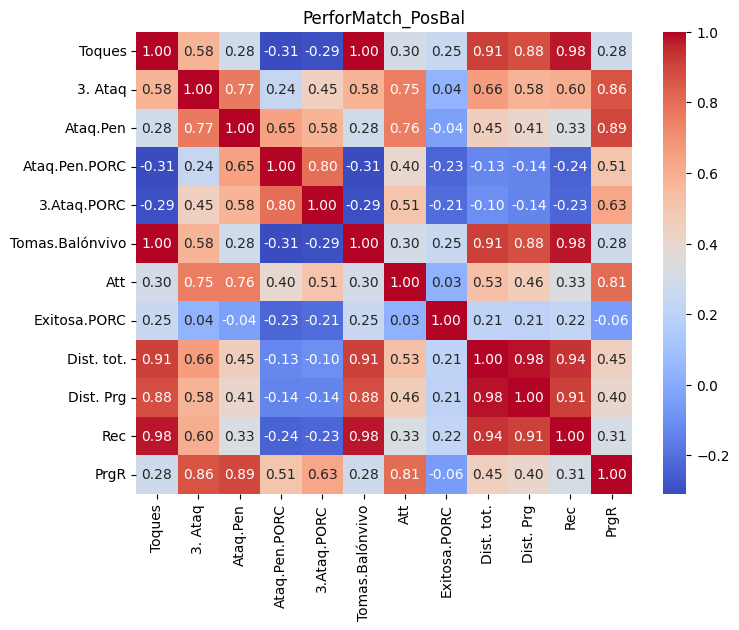

In [24]:
import seaborn as sns

print(PerforMatch_PosBal.columns)

correlation_matrix = PerforMatch_PosBal.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PerforMatch_PosBal')
plt.show()

###PCA

A continuación, para minimizar la cantidad de atributos por Sub-Base de Datos, se realizará un estudio de Análisis de Componentes Principales (PCA).

####EstEst

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(PerforMatch_EstEst), columns=PerforMatch_EstEst.columns)

In [29]:
data_scaled.head()

PenEjec  Goles/90    Ast/90    G+a/90
0 -0.241063 -0.764063 -0.268531 -0.702183
1 -0.241063 -0.764063 -0.768327 -0.964915
2 -0.241063 -0.764063 -0.768327 -0.964915
3 -0.241063 -0.202107 -0.768327 -0.552050
4 -0.241063  2.454413 -0.768327  1.399674

In [30]:
from sklearn.decomposition import PCA
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

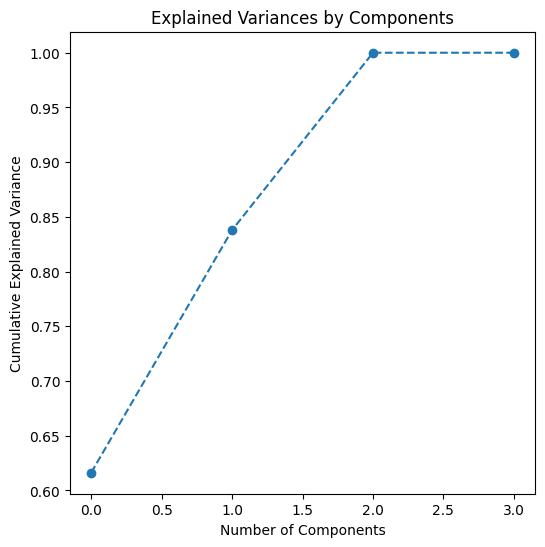

In [31]:
# visualize the Explained Individual Components
plt.figure(figsize = (6,6))
plt.plot(range(0,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [32]:
pc_comps = ['PC1','PC2']
data_pca = pd.DataFrame(np.round(pca.components_[:2,:],2),index=pc_comps,columns=data_scaled.columns)
print(data_pca.T)
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

           PC1   PC2
PenEjec   0.37 -0.65
Goles/90  0.54 -0.28
Ast/90    0.43  0.69
G+a/90    0.62  0.16


####CreaGolTir

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(PerforMatch_CreaGolTir), columns=PerforMatch_CreaGolTir.columns)

Text(0, 0.5, 'Cumulative Explained Variance')

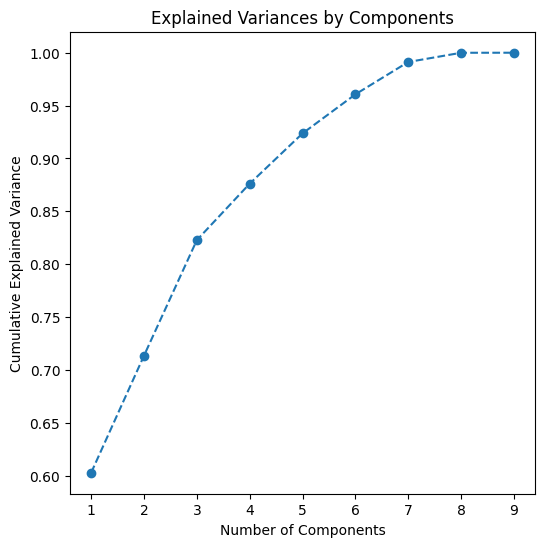

In [34]:
from sklearn.decomposition import PCA
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# visualize the Explained Individual Components
plt.figure(figsize = (6,6))
#plt.plot(range(5,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [35]:
pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:len(pc_comps),:],2),index=pc_comps,columns=data_scaled.columns)
print(data_pca.T)
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

             PC1   PC2   PC3   PC4
ACT.ACT     0.41 -0.03  0.28 -0.09
ACT.SCA90   0.31  0.45 -0.26 -0.20
PassLive    0.38 -0.05  0.25 -0.22
PassDead    0.24  0.45  0.62  0.27
HASTA       0.33 -0.34 -0.23 -0.00
TiroalTiro  0.32 -0.39 -0.02 -0.48
FaltRecib   0.32 -0.31 -0.16  0.78
ACG.ACG     0.40  0.00  0.00  0.05
ACG.GCA90   0.25  0.48 -0.58  0.03


####PosBal

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(PerforMatch_PosBal), columns=PerforMatch_PosBal.columns)

Text(0, 0.5, 'Cumulative Explained Variance')

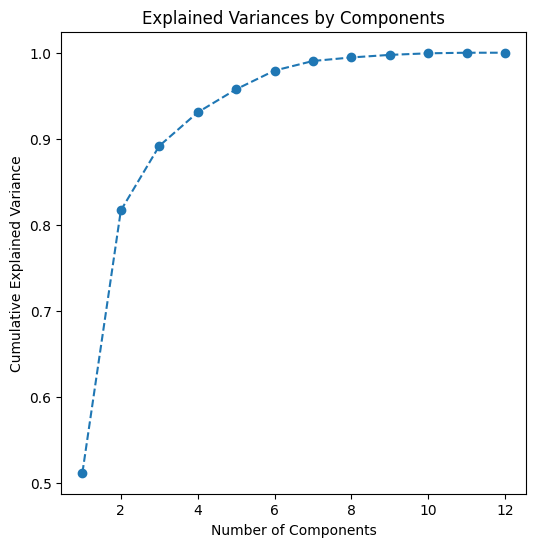

In [37]:
from sklearn.decomposition import PCA
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# visualize the Explained Individual Components
plt.figure(figsize = (6,6))
#plt.plot(range(5,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [38]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:len(pc_comps),:],2),index=pc_comps,columns=data_scaled.columns)
print(data_pca.T)
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

                  PC1   PC2   PC3
Toques           0.35 -0.24 -0.08
3. Ataq          0.34  0.19 -0.00
Ataq.Pen         0.27  0.34  0.04
Ataq.Pen.PORC    0.03  0.45  0.01
3.Ataq.PORC      0.05  0.47  0.06
Tomas.Balónvivo  0.35 -0.24 -0.08
Att              0.28  0.28  0.11
Exitosa.PORC     0.07 -0.17  0.98
Dist. tot.       0.38 -0.13 -0.05
Dist. Prg        0.36 -0.15 -0.06
Rec              0.36 -0.21 -0.09
PrgR             0.28  0.34  0.04


####TipBas

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(PerforMatch_TipPas), columns=PerforMatch_TipPas.columns)

Text(0, 0.5, 'Cumulative Explained Variance')

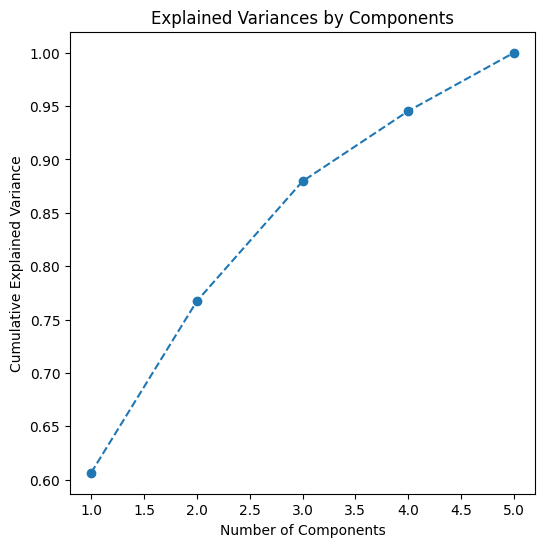

In [40]:
from sklearn.decomposition import PCA
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# visualize the Explained Individual Components
plt.figure(figsize = (6,6))
#plt.plot(range(5,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [41]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:len(pc_comps),:],2),index=pc_comps,columns=data_scaled.columns)
print(data_pca.T)
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

                  PC1   PC2   PC3
TiPas.Balónvivo  0.47  0.36 -0.40
PL               0.43 -0.36  0.67
Camb             0.43  0.63  0.10
PA               0.49 -0.11  0.18
Bloqueos         0.40 -0.58 -0.58


####Tir

Text(0, 0.5, 'Cumulative Explained Variance')

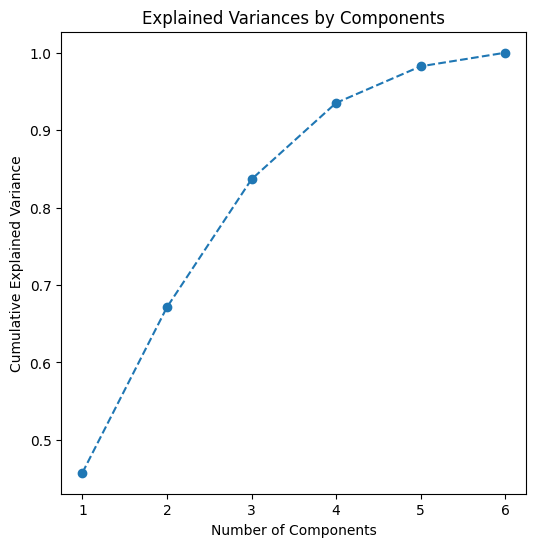

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(PerforMatch_Tir), columns=PerforMatch_Tir.columns)

from sklearn.decomposition import PCA
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# visualize the Explained Individual Components
plt.figure(figsize = (6,6))
#plt.plot(range(5,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [43]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:len(pc_comps),:],2),index=pc_comps,columns=data_scaled.columns)
print(data_pca.T)
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

             PC1   PC2   PC3
Goles       0.52 -0.23 -0.30
Disp        0.48 -0.44 -0.21
PORC de TT  0.39  0.44  0.45
TalArc/90   0.48 -0.06  0.10
G/T         0.33  0.58  0.06
DistDisp    0.02 -0.48  0.81


####Pas

Text(0, 0.5, 'Cumulative Explained Variance')

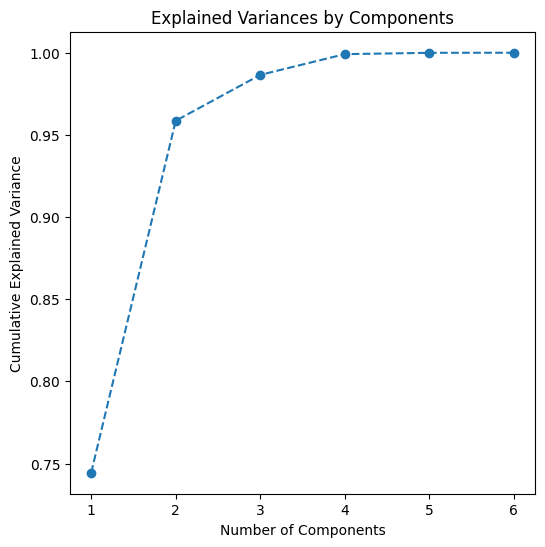

In [44]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(PerforMatch_Pas), columns=PerforMatch_Pas.columns)

#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# visualize the Explained Individual Components
plt.figure(figsize = (6,6))
#plt.plot(range(5,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [45]:
pc_comps = ['PC1','PC2']
data_pca = pd.DataFrame(np.round(pca.components_[:len(pc_comps),:],2),index=pc_comps,columns=data_scaled.columns)
print(data_pca.T)
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

                  PC1   PC2
Cmp              0.46 -0.17
Total.Intent     0.45 -0.23
Total.Cmp.PORC   0.30  0.63
Cortos.Cmp       0.46 -0.20
Cortos.Intent    0.45 -0.23
Cortos.Cmp.PORC  0.29  0.65


####AccDef

Text(0, 0.5, 'Cumulative Explained Variance')

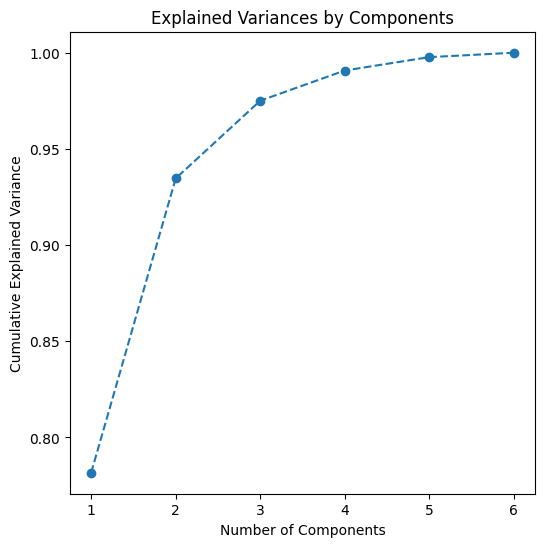

In [46]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(PerforMatch_AccDef), columns=PerforMatch_AccDef.columns)

#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# visualize the Explained Individual Components
plt.figure(figsize = (6,6))
#plt.plot(range(5,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [47]:
pc_comps = ['PC1','PC2']
data_pca = pd.DataFrame(np.round(pca.components_[:len(pc_comps),:],2),index=pc_comps,columns=data_scaled.columns)
print(data_pca.T)
def color_high(val):
    if val <-0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

                   PC1   PC2
Derribos.Tkl      0.45 -0.09
Derribos.TklG     0.45 -0.08
Desafio.Tkl       0.44  0.03
Desafio.Tkl.PORC  0.16  0.98
Bloqueos.1        0.41 -0.14
Tkl+Int           0.45 -0.07


#Clusterización por Delanteros, Mediocentros y Defensas.


En esta sección, se realizará la Clusterización por posición (Defensas, Mediocentros y Delanteros).

En una primera instancia, se seleccionarán los atributos más relevantes (o los principales) para cada una de las posiciones a abarcar, para luego en una segunda, llevar a cabo el proceso de clusterizar como tal.

##Libraries Loads

In [48]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00


In [49]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-Means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import plotly.express as px

from google.colab import files

##Selección de atributos principales por Posición
Se separará el estudio de la base de datos en delanteros, mediocentros y defensores, esto con la finalidad de un estudio más enfocado.

###Defensas

In [52]:
df=PerforMatch.copy()

      RL  Edad  G+a/90  ACT.SCA90  PassLive  PassDead  HASTA  TiroalTiro  \
0      1    23    0.07       1.68        16         4      0           0   
3      5    25    0.11       0.56         6         0      0           4   
6      8    27    0.05       0.68        12         1      0           1   
8     11    24    0.07       0.88        23         0      0           3   
9     12    26    0.11       2.02        25         5      3           1   
10    13    22    0.12       2.51        41         9      6           3   
11    14    25    0.15       1.33        24         0      1           2   
12    15    28    0.07       1.97        45         1      0           3   
13    16    28    0.18       1.59        28         0      2           4   
14    18    24    0.29       5.27        80        33      5           6   
19    24    26    0.00       1.82        19         0      0           0   
20    25    27    0.13       1.24        41         1      0           3   
27    34    

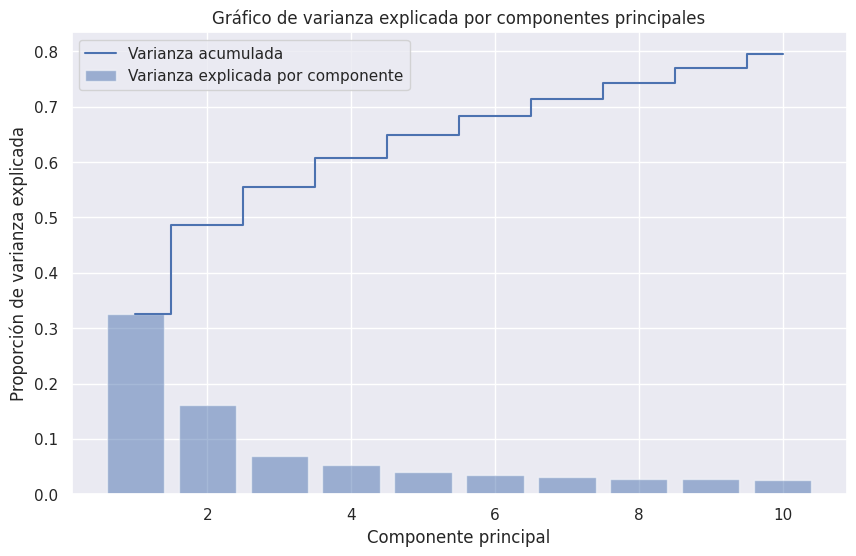

Los 20 atributos principales basados en los primeros 10 componentes de PCA ponderados por varianza explicada son:
Index(['Att', 'Rec', 'Total.Intent', 'Dist. tot.', 'Tkl+Int', 'Dist. Prg',
       '3. Ataq', 'PrgR', 'Bloqueos', 'Bloqueos.1', 'Recup.', 'HASTA',
       'ACT.SCA90', 'Camb', 'Derribos.TklG'],
      dtype='object')


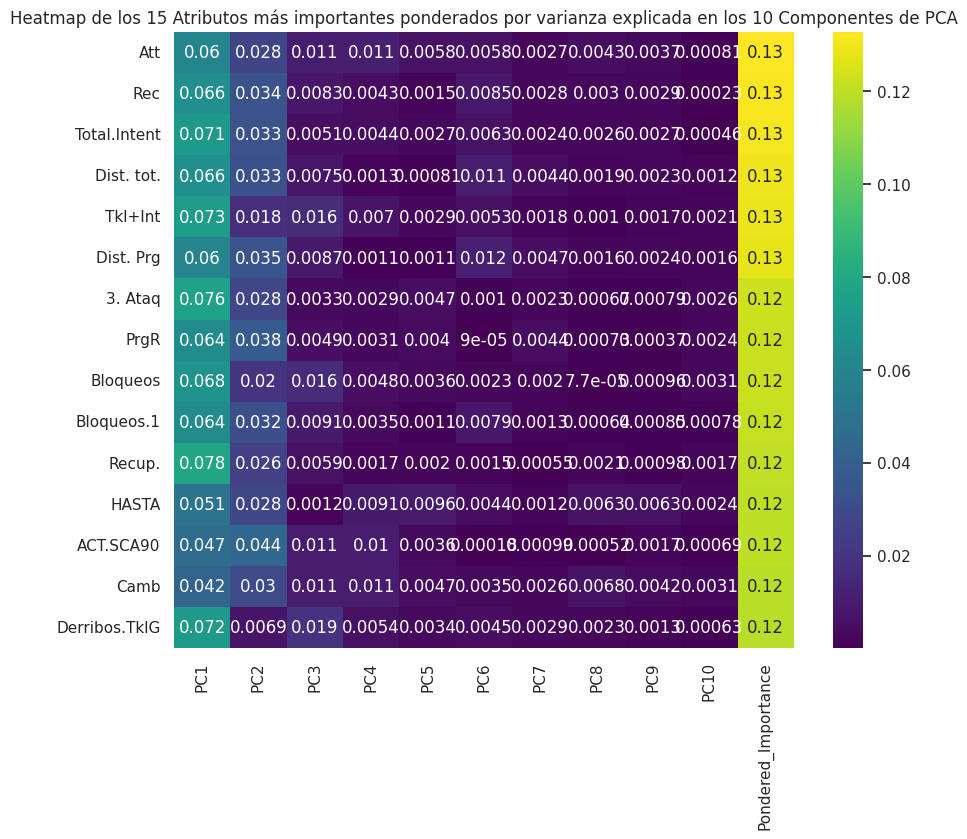

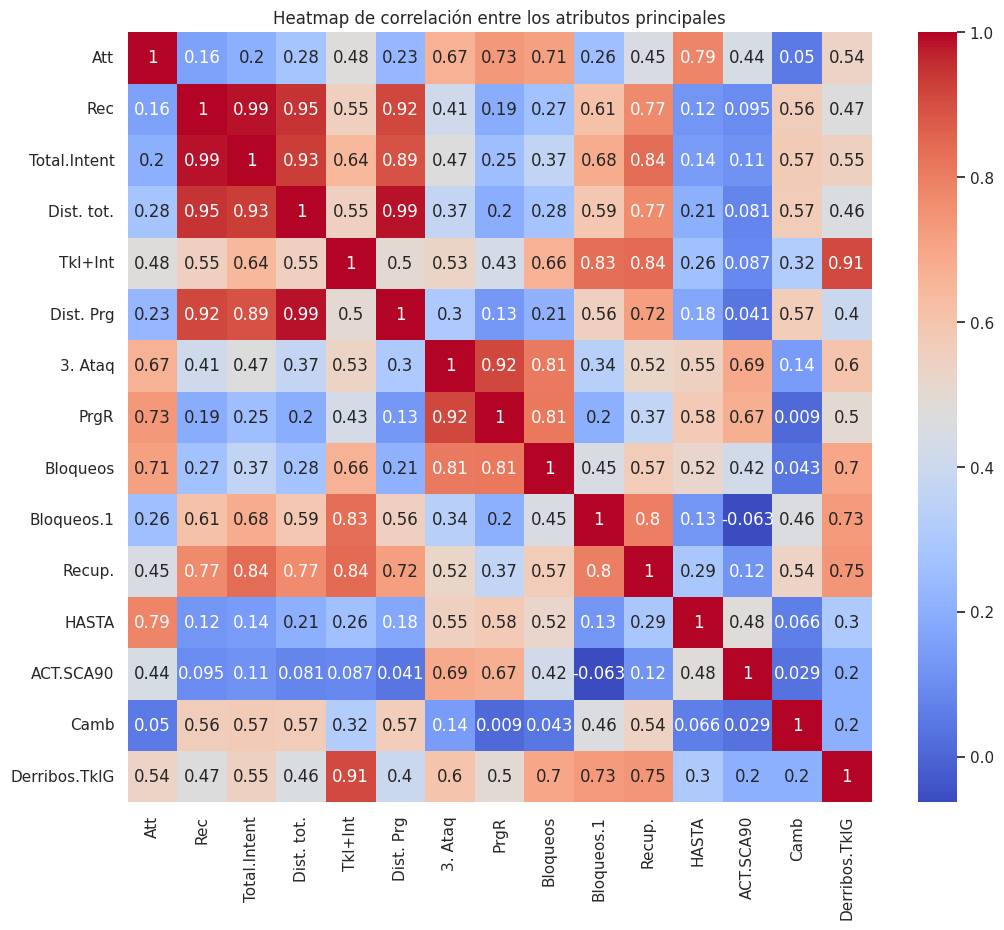

In [54]:
                                                        ## LIMPIEZA DE DATOS ##

# Filtrar por los elementos que tengan el atributo Posc = 'DF' y Posc 2 = 'DF'
df_filtered = df[(df['Posc'] == 'DF') | (df['Posc 2'] == 'DF')]

# Filtrar por los elementos que tengan el atributo Minutos >= 450
df_filtered_minutes = df_filtered[df_filtered['Minutos'] >= 450]

# Sólo atributos numéricos de df_filtered_minutes
df_numeric = df_filtered_minutes.select_dtypes(include=np.number)

# Filtro personal de atributos redundantes
columns_to_remove = ['PenEjec','Minutos','Goles','Toques','Goles/90','Ast/90','Dist.tot','Cortos.Intent','TiPas.Balónvivo','Tomas.Balónvivo','Total.Cmp.PORC','Cortos.Cmp.PORC','Derribos.Tkl','Cortos.Cmp','Cmp', 'ACG.ACG','ACT.ACT','Ataq.Pen.PORC']
df_numeric_cleaned = df_numeric.drop(columns=columns_to_remove, errors='ignore')
print(df_numeric_cleaned)

                                                              ## ANÁLISIS PCA ##

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric_cleaned)

# Aplicar PCA
pca = PCA(n_components=10)  # PCA10 (80%)
X_pca = pca.fit_transform(X_scaled)

# Obtener la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Gráfico de la varianza explicada y acumulada
plt.figure(figsize=(10, 6))

# Gráfico de la varianza explicada por cada componente
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada por componente')

# Gráfico de la varianza acumulada
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza acumulada')

plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componente principal')
plt.legend(loc='best')
plt.title('Gráfico de varianza explicada por componentes principales')
plt.grid(True)
plt.show()

# Obtener las cargas de los componentes principales
loadings = pca.components_

# Obtener la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Convertir las cargas en un DataFrame
pca_loadings_df = pd.DataFrame(loadings.T,
                               columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
                               index=df_numeric_cleaned.columns)

# Ponderar las cargas por la varianza explicada de cada componente
for i in range(len(explained_variance_ratio)):
    pca_loadings_df[f'PC{i+1}'] = pca_loadings_df[f'PC{i+1}'] * explained_variance_ratio[i]

# Calcular la importancia ponderada total de cada atributo
pca_loadings_df['Pondered_Importance'] = pca_loadings_df.abs().sum(axis=1)

# Seleccionar los 20 atributos más importantes
top_20_attributes = pca_loadings_df['Pondered_Importance'].sort_values(ascending=False).head(15).index

# Mostrar los 20 atributos más importantes
print("Los 20 atributos principales basados en los primeros 10 componentes de PCA ponderados por varianza explicada son:")
print(top_20_attributes)

# Crear un heatmap para visualizar estos atributos en los primeros 10 componentes principales
plt.figure(figsize=(10, 8))
sns.heatmap(pca_loadings_df.loc[top_20_attributes].abs(), annot=True, cmap='viridis')
plt.title('Heatmap de los 15 Atributos más importantes ponderados por varianza explicada en los 10 Componentes de PCA')
plt.show()

# Obteniendo matriz con atributos principales
Atributos=list(top_20_attributes)

# Heatmap de los 20 atributos principales
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_cleaned[Atributos].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación entre los atributos principales')
plt.show()

In [55]:
# Agregar la columna 'RL' al DataFrame df_filtered
df_download = df_filtered[['RL'] + Atributos]

DF_PerforMatch=df_download.copy()

#Se realiza la descarga de la BD, únicamente para tenerla como respaldo. La información queda guardada en el código en el df 'DF_PerforMatch'
# Descargar el DataFrame como archivo csv
df_download.to_csv('DF_atributos.csv', index=False)
files.download('DF_atributos.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Mediocentros

In [58]:
df=PerforMatch.copy()

In [59]:
df.head()

RL             Jugador País Posc Posc 2            Equipo  Edad  \
0   1          MAX AARONS  ENG   DF     DF       Bournemouth    23   
1   3  BÉNIE ADAMA TRAORE  CIV   DL     CC  Sheffield United    20   
2   4         TYLER ADAMS  USA   CC     CC       Bournemouth    24   
3   5    TOSIN ADARABIOYO  ENG   DF     DF            Fulham    25   
4   6      ELIJAH ADEBAYO  ENG   DL     DL        Luton Town    25   

  Rango Etario  Minutos  PenEjec  Goles/90  Ast/90  G+a/90  ACT.ACT  \
0      Promesa     1237        0      0.00    0.07    0.07       23   
1      Promesa      387        0      0.00    0.00    0.00        6   
2      Promesa      121        0      0.00    0.00    0.00        3   
3       Maduro     1617        0      0.11    0.00    0.11       10   
4       Maduro     1419        0      0.63    0.00    0.63       31   

   ACT.SCA90  PassLive  PassDead  HASTA  TiroalTiro  FaltRecib  ACG.ACG  \
0       1.68        16         4      0           0          3        2   
1       1.40         6         0      0           0          0        1   
2       2.25         2         1      0           0          0        0   
3       0.56         6         0      0           4          0        0   
4       1.97        19         0      5           5          2        5   

   ACG.GCA90  Toques  3. Ataq  Ataq.Pen  Ataq.Pen.PORC  3.Ataq.PORC  \
0       0.15     711      165        11           0.02         0.23   
1       0.23     112       48         9           0.08         0.43   
2       0.00      91       14         4           0.04         0.15   
3       0.00    1390       48        29           0.02         0.04   
4       0.32     462      243        82           0.18         0.53   

   Tomas.Balónvivo  Att  Exitosa.PORC  Dist. tot.  Dist. Prg   Rec  PrgR  \
0              711   34          41.2        2174       1121   371    26   
1              112   22          22.7         462        174    69    14   
2               91    3          66.7         193        116    52     1   
3             1390    3          33.3        4560       2661  1009     5   
4              462   67          26.9        1516        425   337   110   

   TiPas.Balónvivo  PL  Camb  PA  Bloqueos  Goles  Disp  PORC de TT  \
0              453   2     3   1        23      0     2         0.0   
1               65   2     0   1         4      0     1       100.0   
2               67   0     1   0         0      0     0         0.0   
3             1181   1     9   2         8      2    14        35.7   
4              202   1     0   1         5     10    31        45.2   

   TalArc/90   G/T  DistDisp   Cmp  Total.Intent  Total.Cmp.PORC  Cortos.Cmp  \
0       0.00  0.00      23.9   450           581            77.5         220   
1       0.23  0.00      15.3    55            71            77.5          34   
2       0.00  0.00       0.0    59            71            83.1          35   
3       0.28  0.14      14.2  1028          1216            84.5         277   
4       0.89  0.32       9.6   144           204            70.6          94   

   Cortos.Intent  Cortos.Cmp.PORC  Derribos.Tkl  Derribos.TklG  Desafio.Tkl  \
0            248             88.7            29             19           20   
1             38             89.5             4              2            0   
2             39             89.7             4              3            2   
3            307             90.2            21             11           12   
4            122             77.0             4              1            1   

   Desafio.Tkl.PORC  Bloqueos.1  Tkl+Int  Penal concedido  Recup.  \
0              58.8           9       37                1      75   
1               0.0           4        5                0      22   
2              66.7           2        8                0       7   
3              57.1          16       46                0      43   
4               8.3          13       10                0      34   

   Aer.Ganados  Aer.Ga

In [60]:
# Filtra el DataFrame para incluir solo las filas donde "posc" y "posc 2" son "CC"
df_filtered = df[(df['Posc'] == 'CC') & (df['Posc 2'] == 'CC')]

# Muestra las primeras filas del DataFrame filtrado
df_filtered.head()

RL           Jugador País Posc Posc 2            Equipo  Edad  \
2    4       TYLER ADAMS  USA   CC     CC       Bournemouth    24   
16  21     EDSON ÁLVAREZ  MEX   CC     CC   West Ham United    25   
25  30  OLIVER ARBLASTER  ENG   CC     CC  Sheffield United    19   
34  42     CARLOS BALEBA  CMR   CC     CC          Brighton    19   
35  44  SHANDON BAPTISTE  GRN   CC     CC         Brentford    25   

   Rango Etario  Minutos  PenEjec  Goles/90  Ast/90  G+a/90  ACT.ACT  \
2       Promesa      121        0      0.00    0.00    0.00        3   
16       Maduro     2377        0      0.04    0.04    0.08       32   
25      Promesa      943        0      0.00    0.00    0.00       23   
34      Promesa     1325        0      0.00    0.00    0.00       17   
35       Maduro      229        0      0.39    0.39    0.79        5   

    ACT.SCA90  PassLive  PassDead  HASTA  TiroalTiro  FaltRecib  ACG.ACG  \
2        2.25         2         1      0           0          0        0   
16       1.21        24         0      2           3          0        2   
25       2.20        19         2      0           1          0        2   
34       1.15        16         0      0           1          0        1   
35       1.96         4         0      1           0          0        1   

    ACG.GCA90  Toques  3. Ataq  Ataq.Pen  Ataq.Pen.PORC  3.Ataq.PORC  \
2        0.00      91       14         4           0.04         0.15   
16       0.08    1599      201        16           0.01         0.13   
25       0.19     551       93         4           0.01         0.17   
34       0.07     965      139         5           0.01         0.14   
35       0.39     130       34         6           0.05         0.26   

    Tomas.Balónvivo  Att  Exitosa.PORC  Dist. tot.  Dist. Prg  Rec  PrgR  \
2                91    3          66.7         193        116   52     1   
16             1599   42          64.3        5147       2227  948    26   
25              551   25          68.0        1489        634  313     4   
34              965   22          50.0        2903       1423  664     9   
35              130   11          54.5         322        170   69     1   

    TiPas.Balónvivo  PL  Camb  PA  Bloqueos  Goles  Disp  PORC de TT  \
2                67   0     1   0         0      0     0         0.0   
16             1184   2     9   5        14      1    17        17.6   
25              406   0     2   3         8      0     1       100.0   
34              767   0     5   2        10      0    21        23.8   
35               87   0     0   0         5      1     2       100.0   

    TalArc/90   G/T  DistDisp   Cmp  Total.Intent  Total.Cmp.PORC  Cortos.Cmp  \
2        0.00  0.00       0.0    59            71            83.1          35   
16       0.11  0.06      21.1  1033          1207            85.6         518   
25       0.10  0.00      16.6   349           438            79.7         173   
34       0.34  0.00      24.4   713           775            92.0         402   
35       0.79  0.50       6.6    66            90            73.3          33   

    Cortos.Intent  Cortos.Cmp.PORC  Derribos.Tkl  Derribos.TklG  Desafio.Tkl  \
2              39             89.7             4              3            2   
16            573             90.4            80             39           31   
25            200             86.5            23             14            7   
34            429             93.7            40             20           23   
35             39             84.6             4              4            1   

    Desafio.Tkl.PORC  Bloqueos.1  Tkl+Int  Penal concedido  Recup.  \
2               66.7           2        8                0       7   
16              47.0          59      122                1     164   
25              46.7          17       38                0      52   
34              50.0          35       58                0      95   
35              20.0           5        7                0

In [61]:
df_2 = df_filtered[df_filtered['Minutos'] > 450]
df_2.head()


RL            Jugador País Posc Posc 2             Equipo  Edad  \
16  21      EDSON ÁLVAREZ  MEX   CC     CC    West Ham United    25   
25  30   OLIVER ARBLASTER  ENG   CC     CC   Sheffield United    19   
34  42      CARLOS BALEBA  CMR   CC     CC           Brighton    19   
37  46       ROSS BARKLEY  ENG   CC     CC         Luton Town    29   
45  56  RODRIGO BENTANCUR  URU   CC     CC  Tottenham Hotspur    26   

   Rango Etario  Minutos  PenEjec  Goles/90  Ast/90  G+a/90  ACT.ACT  \
16       Maduro     2377        0      0.04    0.04    0.08       32   
25      Promesa      943        0      0.00    0.00    0.00       23   
34      Promesa     1325        0      0.00    0.00    0.00       17   
37       Maduro     2618        0      0.17    0.14    0.31      104   
45       Maduro     1005        0      0.09    0.09    0.18       31   

    ACT.SCA90  PassLive  PassDead  HASTA  TiroalTiro  FaltRecib  ACG.ACG  \
16       1.21        24         0      2           3          0        2   
25       2.20        19         2      0           1          0        2   
34       1.15        16         0      0           1          0        1   
37       3.58        67        11     14           6          3       11   
45       2.78        26         0      1           2          0        4   

    ACG.GCA90  Toques  3. Ataq  Ataq.Pen  Ataq.Pen.PORC  3.Ataq.PORC  \
16       0.08    1599      201        16           0.01         0.13   
25       0.19     551       93         4           0.01         0.17   
34       0.07     965      139         5           0.01         0.14   
37       0.38    1778      430        39           0.02         0.24   
45       0.36     931      250        29           0.03         0.27   

    Tomas.Balónvivo  Att  Exitosa.PORC  Dist. tot.  Dist. Prg   Rec  PrgR  \
16             1599   42          64.3        5147       2227   948    26   
25              551   25          68.0        1489        634   313     4   
34              965   22          50.0        2903       1423   664     9   
37             1778  104          63.5        6416       2807  1115    39   
45              931   21          52.4        2769       1148   730    31   

    TiPas.Balónvivo  PL  Camb  PA  Bloqueos  Goles  Disp  PORC de TT  \
16             1184   2     9   5        14      1    17        17.6   
25              406   0     2   3         8      0     1       100.0   
34              767   0     5   2        10      0    21        23.8   
37             1329   4    24   6        31      5    66        28.8   
45              786   4     0   4        26      1    18        22.2   

    TalArc/90   G/T  DistDisp   Cmp  Total.Intent  Total.Cmp.PORC  Cortos.Cmp  \
16       0.11  0.06      21.1  1033          1207            85.6         518   
25       0.10  0.00      16.6   349           438            79.7         173   
34       0.34  0.00      24.4   713           775            92.0         402   
37       0.65  0.08      21.5  1218          1474            82.6         550   
45       0.36  0.06      16.3   674           800            84.3         384   

    Cortos.Intent  Cortos.Cmp.PORC  Derribos.Tkl  Derribos.TklG  Desafio.Tkl  \
16            573             90.4            80             39           31   
25            200             86.5            23             14            7   
34            429             93.7            40             20           23   
37            611             90.0            47             19           11   
45            426             90.1            23             15           10   

    Desafio.Tkl.PORC  Bloqueos.1  Tkl+Int  Penal concedido  Recup.  \
16              47.0          59      122                1     164   
25              46.7          17       38                0      52   
34              50.0          35       58                0      95   
37              22.9          25       72                0     201   
45              41.7          15       4

In [62]:

df_selected = df_2[['Goles/90', 'Ast/90', 'ACT.SCA90', 'ACG.ACG', 'Toques', 'Att', 'Exitosa.PORC', 'Dist. Prg', 'PrgR', 'Bloqueos', 'PORC de TT', 'Total.Cmp.PORC', 'Desafio.Tkl.PORC', 'Recup.']]
df_selected.head()


Goles/90  Ast/90  ACT.SCA90  ACG.ACG  Toques  Att  Exitosa.PORC  \
16      0.04    0.04       1.21        2    1599   42          64.3   
25      0.00    0.00       2.20        2     551   25          68.0   
34      0.00    0.00       1.15        1     965   22          50.0   
37      0.17    0.14       3.58       11    1778  104          63.5   
45      0.09    0.09       2.78        4     931   21          52.4   

    Dist. Prg  PrgR  Bloqueos  PORC de TT  Total.Cmp.PORC  Desafio.Tkl.PORC  \
16       2227    26        14        17.6            85.6              47.0   
25        634     4         8       100.0            79.7              46.7   
34       1423     9        10        23.8            92.0              50.0   
37       2807    39        31        28.8            82.6              22.9   
45       1148    31        26        22.2            84.3              41.7   

    Recup.  
16     164  
25      52  
34      95  
37     201  
45      54

In [63]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 16 to 455
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Goles/90          74 non-null     float64
 1   Ast/90            74 non-null     float64
 2   ACT.SCA90         74 non-null     float64
 3   ACG.ACG           74 non-null     int64  
 4   Toques            74 non-null     int64  
 5   Att               74 non-null     int64  
 6   Exitosa.PORC      74 non-null     float64
 7   Dist. Prg         74 non-null     int64  
 8   PrgR              74 non-null     int64  
 9   Bloqueos          74 non-null     int64  
 10  PORC de TT        74 non-null     float64
 11  Total.Cmp.PORC    74 non-null     float64
 12  Desafio.Tkl.PORC  74 non-null     float64
 13  Recup.            74 non-null     int64  
dtypes: float64(7), int64(7)
memory usage: 8.7 KB


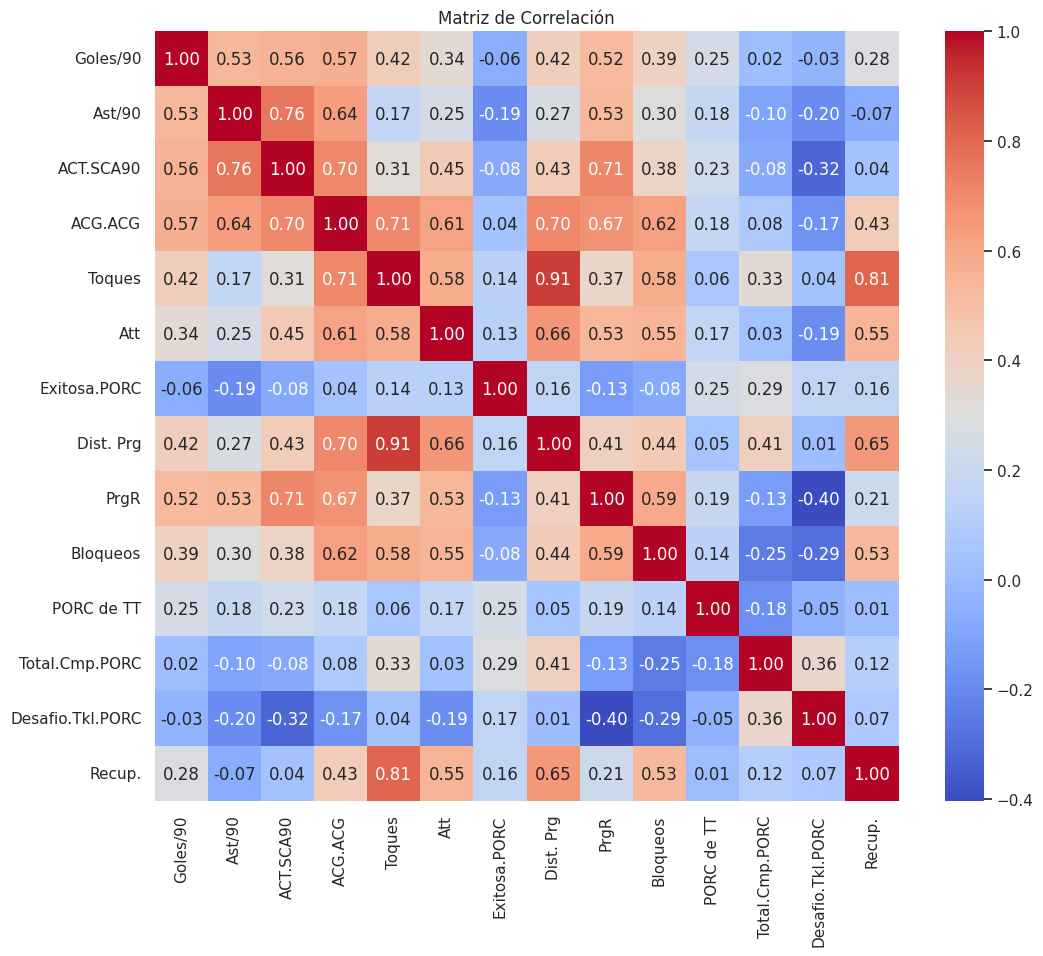

In [64]:

correlation_matrix = df_selected.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [65]:
# Calcular la correlación entre las variables
correlation_matrix = df_selected.corr().abs()

# Seleccionar la parte superior del triángulo de la matriz de correlación
# Use the built-in bool type instead of the deprecated np.bool alias
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encontrar las columnas con una correlación alta entre sí
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Eliminar las columnas con correlación alta
df_reduced = df_selected.drop(columns=to_drop)

print("Columnas eliminadas:")
for column in to_drop:
  print(f"- {column}: Alta correlación con otras variables.")


print("\nDataFrame con dimensionalidad reducida:")
df_reduced.head()


Columnas eliminadas:
- Dist. Prg: Alta correlación con otras variables.
- Recup.: Alta correlación con otras variables.

DataFrame con dimensionalidad reducida:


Goles/90  Ast/90  ACT.SCA90  ACG.ACG  Toques  Att  Exitosa.PORC  PrgR  \
16      0.04    0.04       1.21        2    1599   42          64.3    26   
25      0.00    0.00       2.20        2     551   25          68.0     4   
34      0.00    0.00       1.15        1     965   22          50.0     9   
37      0.17    0.14       3.58       11    1778  104          63.5    39   
45      0.09    0.09       2.78        4     931   21          52.4    31   

    Bloqueos  PORC de TT  Total.Cmp.PORC  Desafio.Tkl.PORC  
16        14        17.6            85.6              47.0  
25         8       100.0            79.7              46.7  
34        10        23.8            92.0              50.0  
37        31        28.8            82.6              22.9  
45        26        22.2            84.3              41.7

In [66]:
# Crear una nueva columna 'RL' en df_reduced
df_reduced['RL'] = df_2['RL']

# Mostrar las primeras filas del DataFrame con la nueva columna
df_reduced.head()


Goles/90  Ast/90  ACT.SCA90  ACG.ACG  Toques  Att  Exitosa.PORC  PrgR  \
16      0.04    0.04       1.21        2    1599   42          64.3    26   
25      0.00    0.00       2.20        2     551   25          68.0     4   
34      0.00    0.00       1.15        1     965   22          50.0     9   
37      0.17    0.14       3.58       11    1778  104          63.5    39   
45      0.09    0.09       2.78        4     931   21          52.4    31   

    Bloqueos  PORC de TT  Total.Cmp.PORC  Desafio.Tkl.PORC  RL  
16        14        17.6            85.6              47.0  21  
25         8       100.0            79.7              46.7  30  
34        10        23.8            92.0              50.0  42  
37        31        28.8            82.6              22.9  46  
45        26        22.2            84.3              41.7  56

In [67]:

# Reordena las columnas para que 'RL' sea la primera
cols = df_reduced.columns.tolist()
cols.remove('RL')
df_reduced = df_reduced[['RL'] + cols]

# Muestra las primeras filas del DataFrame con la nueva columna
df_reduced.head()


RL  Goles/90  Ast/90  ACT.SCA90  ACG.ACG  Toques  Att  Exitosa.PORC  PrgR  \
16  21      0.04    0.04       1.21        2    1599   42          64.3    26   
25  30      0.00    0.00       2.20        2     551   25          68.0     4   
34  42      0.00    0.00       1.15        1     965   22          50.0     9   
37  46      0.17    0.14       3.58       11    1778  104          63.5    39   
45  56      0.09    0.09       2.78        4     931   21          52.4    31   

    Bloqueos  PORC de TT  Total.Cmp.PORC  Desafio.Tkl.PORC  
16        14        17.6            85.6              47.0  
25         8       100.0            79.7              46.7  
34        10        23.8            92.0              50.0  
37        31        28.8            82.6              22.9  
45        26        22.2            84.3              41.7

In [68]:

for column in df_reduced.columns:
  if column != 'RL':
    df_reduced[column] = df_reduced[column].round(5)

df_reduced.head()


RL  Goles/90  Ast/90  ACT.SCA90  ACG.ACG  Toques  Att  Exitosa.PORC  PrgR  \
16  21      0.04    0.04       1.21        2    1599   42          64.3    26   
25  30      0.00    0.00       2.20        2     551   25          68.0     4   
34  42      0.00    0.00       1.15        1     965   22          50.0     9   
37  46      0.17    0.14       3.58       11    1778  104          63.5    39   
45  56      0.09    0.09       2.78        4     931   21          52.4    31   

    Bloqueos  PORC de TT  Total.Cmp.PORC  Desafio.Tkl.PORC  
16        14        17.6            85.6              47.0  
25         8       100.0            79.7              46.7  
34        10        23.8            92.0              50.0  
37        31        28.8            82.6              22.9  
45        26        22.2            84.3              41.7

In [71]:
MC_PerforMatch=df_reduced.copy()
#De igual manera que en la anterior, se guardará la información en el código, y además se exportará en csv.
# Descargar el DataFrame como archivo csv
df_reduced.to_csv('df_medios.csv', index=False)
files.download('df_medios.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Delanteros

In [74]:
DL_df=PerforMatch.copy()

In [76]:
DL_df.describe().T

count         mean          std    min       25%       50%  \
RL                456.0   285.600877   168.877922   1.00   138.750   284.500   
Edad              456.0    25.256579     4.060796  17.00    22.000    25.000   
Minutos           456.0  1491.809211   930.787853  92.00   696.250  1371.000   
PenEjec           456.0     0.210526     0.874284   0.00     0.000     0.000   
Goles/90          456.0     0.149561     0.195960   0.00     0.000     0.080   
Ast/90            456.0     0.107610     0.140211   0.00     0.000     0.060   
G+a/90            456.0     0.257083     0.266724   0.00     0.050     0.180   
ACT.ACT           456.0    40.094298    37.811067   0.00    13.000    27.000   
ACT.SCA90         456.0     2.406601     1.398572   0.00     1.360     2.220   
PassLive          456.0    29.368421    27.033642   0.00    10.000    21.000   
PassDead          456.0     3.289474     7.904344   0.00     0.000     0.000   
HASTA             456.0     2.344298     3.499747   0.00     0.000     1.000   
TiroalTiro        456.0     2.622807     2.982411   0.00     0.000     2.000   
FaltRecib         456.0     1.684211     2.306477   0.00     0.000     1.000   
ACG.ACG           456.0     4.495614     5.028270   0.00     1.000     3.000   
ACG.GCA90         456.0     0.267456     0.269033   0.00     0.080     0.200   
Toques            456.0   970.929825   726.932849  39.00   388.000   813.000   
3. Ataq           456.0   263.304825   238.305901   2.00    82.250   190.000   
Ataq.Pen          456.0    43.502193    47.815028   0.00    11.000    27.000   
Ataq.Pen.PORC     456.0     0.058355     0.055535   0.00     0.020     0.030   
3.Ataq.PORC       456.0     0.310899     0.177401   0.01     0.170     0.295   
Tomas.Balónvivo   456.0   970.695175   726.815987  39.00   388.000   813.000   
Att               456.0    30.978070    33.155504   0.00     8.000    20.000   
Exitosa.PORC      456.0    45.005263    18.725479   0.00    35.775    45.550   
Dist. tot.        456.0  2932.875000  2317.877394  81.00  1038.000  2340.000   
Dist. Prg         456.0  1491.429825  1273.444941  22.00   481.500  1147.000   
Rec               456.0   645.116228   517.691895  18.00   245.000   531.000   
PrgR              456.0    63.412281    71.966666   0.00    12.750    35.500   
TiPas.Balónvivo   456.0   723.833333   595.479704  18.00   256.250   568.500   
PL                456.0     2.896930     4.658009   0.00     0.000     1.000   
Camb              456.0     4.265351     6.103303   0.00     0.000     2.000   
PA                456.0     2.910088     3.138318   0.00     1.000     2.000   
Bloqueos          456.0    15.866228    13.152432   0.00     6.000    13.000   
Goles             456.0     2.620614     3.902483   0.00     0.000     1.000   
Disp              456.0    22.682018    23.199512   0.00     6.000    14.000   
PORC de TT        456.0    30.430702    19.146202   0.00    20.000    31.300   
TalArc/90         456.0     0.483421     0.471798   0.00     0.130     0.330   
G/T               456.0     0.090724     0.110223   0.00     0.000     0.070   
DistDisp          456.0    15.946711     5.580834   0.00    12.500    16.100   
Cmp               456.0   640.633772   560.730461  19.00   217.750   490.000   
Total.Intent      456.0   787.421053   643.084034  22.00   281.500   626.000   
Total.Cmp.PORC    456.0    78.707018     7.943932  52.70    73.575    78.950   
Cortos.Cmp        456.0   319.087719   267.796833  12.00   117.000   257.500   
Cortos.Intent     456.0   358.197368   286.523467  13.00   138.750   299.000   
Cortos.Cmp.PORC   456.0    87.125877     6.301825  58.90    84.475    87.850   
Derribos.Tkl      456.0    29.267544    23.489318   0.00    11.000    23.500   
Derribos.TklG     456.0    17.190789    14.052523   0.00     6.000    14.000   
Desafio.Tkl       456.0    13.574561    12.063884   0.00     5.000    11.000   
Desafio.Tkl.PORC  456.0    47.388816    18.877002   0.00    36.075    48.050   
Bloqueos.1        

In [77]:
#Se crea copia de datos, con filtro general de 450 minutos para todas las posiciones
DL_df3=DL_df[((DL_df['Posc'] == 'DL') | (DL_df['Posc 2'] == 'DL')) & (DL_df['Minutos'] >= 450)]

In [78]:
#Se filtra con el 50% de los datos, para una mayor representatividad de los jugadores mediocampistas con más minutos jugados
DL_df = DL_df3[(DL_df['Minutos'] >= 1371)]

In [79]:
DL_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 4 to 451
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RL                131 non-null    int64  
 1   Jugador           131 non-null    object 
 2   País              131 non-null    object 
 3   Posc              131 non-null    object 
 4   Posc 2            131 non-null    object 
 5   Equipo            131 non-null    object 
 6   Edad              131 non-null    int64  
 7   Rango Etario      131 non-null    object 
 8   Minutos           131 non-null    int64  
 9   PenEjec           131 non-null    int64  
 10  Goles/90          131 non-null    float64
 11  Ast/90            131 non-null    float64
 12  G+a/90            131 non-null    float64
 13  ACT.ACT           131 non-null    int64  
 14  ACT.SCA90         131 non-null    float64
 15  PassLive          131 non-null    int64  
 16  PassDead          131 non-null    int64  
 17  HA

In [80]:
DL_df.head()

RL         Jugador País Posc Posc 2            Equipo  Edad Rango Etario  \
4    6  ELIJAH ADEBAYO  ENG   DL     DL        Luton Town    25       Maduro   
5    7   SIMON ADINGRA  CIV   DL     DL          Brighton    21      Promesa   
15  20  MIGUEL ALMIRÓN  PAR   DL     DL  Newcastle United    29       Maduro   
17  22  JULIÁN ÁLVAREZ  ARG   CC     DL   Manchester City    23      Promesa   
18  23    ZEKI AMDOUNI  SUI   DL     DL           Burnley    22      Promesa   

    Minutos  PenEjec  Goles/90  Ast/90  G+a/90  ACT.ACT  ACT.SCA90  PassLive  \
4      1419        0      0.63    0.00    0.63       31       1.97        19   
5      2222        0      0.24    0.04    0.28       77       3.12        51   
15     1937        0      0.14    0.05    0.19       52       2.41        40   
17     2647        2      0.37    0.27    0.65      118       4.01        74   
18     1953        1      0.23    0.05    0.28       50       2.30        30   

    PassDead  HASTA  TiroalTiro  FaltRecib  ACG.ACG  ACG.GCA90  Toques  \
4          0      5           5          2        5       0.32     462   
5          1     13           7          3        4       0.16    1159   
15         1      3           7          1        4       0.19    1029   
17        28      4          10          2       15       0.51    1554   
18         0      5           7          5        4       0.18     789   

    3. Ataq  Ataq.Pen  Ataq.Pen.PORC  3.Ataq.PORC  Tomas.Balónvivo  Att  \
4       243        82           0.18         0.53              462   67   
5       627       153           0.13         0.54             1159  123   
15      475        86           0.08         0.46             1029   52   
17      988       149           0.10         0.64             1552   42   
18      337        68           0.09         0.43              788   88   

    Exitosa.PORC  Dist. tot.  Dist. Prg   Rec  PrgR  TiPas.Balónvivo  PL  \
4           26.9        1516        425   337   110              202   1   
5           40.7        5063       2996   795   278              815   7   
15          44.2        4488       2276   741   162              788   5   
17          47.6        4459       2092  1103   180             1069   9   
18          33.0        3229       1654   513    93              445   7   

    Camb  PA  Bloqueos  Goles  Disp  PORC de TT  TalArc/90   G/T  DistDisp  \
4      0   1         5     10    31        45.2       0.89  0.32       9.6   
5      2   2        29      6    52        42.3       0.89  0.12      15.9   
15     0   3        16      3    41        29.3       0.56  0.07      16.1   
17     1   4        27     11    96        38.5       1.26  0.09      17.8   
18     1   4        19      5    48        43.8       0.97  0.08      17.8   

     Cmp  Total.Intent  Total.Cmp.PORC  Cortos.Cmp  Cortos.Intent  \
4    144           204            70.6          94            122   
5    634           840            75.5         412            491   
15   668           801            83.4         411            456   
17  1011          1258            80.4         615            679   
18   396           500            79.2         216            265   

    Cortos.Cmp.PORC  Derribos.Tkl  Derribos.TklG  Desafio.Tkl  \
4              77.0             4              1            1   
5              83.9            45             20           19   
15             90.1            36             24           11   
17             90.6            24             13            8   
18             81.5            27             18            7   

    Desafio.Tkl.PORC  Bloqueos.1  Tkl+Int  Penal concedido  Recup.  \
4                8.3          13       10                0      34   
5               45.2          31       64                0     118   
15              37.9          29       46                0      97   
17              25.0          30       26                0      98   
18              28.0          23       36                0      

In [81]:
DL_df=DL_df.drop(['RL','Jugador','País','Posc','Posc 2','Equipo','Edad','Rango Etario','Minutos'],axis=1)

In [82]:
# Calcular la correlación entre las variables
correlation_matrix = DL_df.corr().abs()

# Seleccionar la parte superior del triángulo de la matriz de correlación
# Use the built-in bool type instead of the deprecated np.bool alias
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encontrar las columnas con una correlación alta entre sí
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Eliminar las columnas con correlación alta
DL_df = DL_df.drop(columns=to_drop)

print("Columnas eliminadas:")
for column in to_drop:
  print(f"- {column}: Alta correlación con otras variables.")


print("\nDataFrame con dimensionalidad reducida:")
DL_df.head()

Columnas eliminadas:
- G+a/90: Alta correlación con otras variables.
- ACT.SCA90: Alta correlación con otras variables.
- PassLive: Alta correlación con otras variables.
- ACG.GCA90: Alta correlación con otras variables.
- Toques: Alta correlación con otras variables.
- 3. Ataq: Alta correlación con otras variables.
- Tomas.Balónvivo: Alta correlación con otras variables.
- Att: Alta correlación con otras variables.
- Dist. tot.: Alta correlación con otras variables.
- Dist. Prg: Alta correlación con otras variables.
- Rec: Alta correlación con otras variables.
- PrgR: Alta correlación con otras variables.
- TiPas.Balónvivo: Alta correlación con otras variables.
- Goles: Alta correlación con otras variables.
- Cmp: Alta correlación con otras variables.
- Total.Intent: Alta correlación con otras variables.
- Cortos.Cmp: Alta correlación con otras variables.
- Cortos.Intent: Alta correlación con otras variables.
- Cortos.Cmp.PORC: Alta correlación con otras variables.
- Derribos.TklG: Al

PenEjec  Goles/90  Ast/90  ACT.ACT  PassDead  HASTA  TiroalTiro  \
4         0      0.63    0.00       31         0      5           5   
5         0      0.24    0.04       77         1     13           7   
15        0      0.14    0.05       52         1      3           7   
17        2      0.37    0.27      118        28      4          10   
18        1      0.23    0.05       50         0      5           7   

    FaltRecib  ACG.ACG  Ataq.Pen  Ataq.Pen.PORC  3.Ataq.PORC  Exitosa.PORC  \
4           2        5        82           0.18         0.53          26.9   
5           3        4       153           0.13         0.54          40.7   
15          1        4        86           0.08         0.46          44.2   
17          2       15       149           0.10         0.64          47.6   
18          5        4        68           0.09         0.43          33.0   

    PL  Camb  PA  Bloqueos  Disp  PORC de TT  TalArc/90   G/T  DistDisp  \
4    1     0   1         5    31        45.2       0.89  0.32       9.6   
5    7     2   2        29    52        42.3       0.89  0.12      15.9   
15   5     0   3        16    41        29.3       0.56  0.07      16.1   
17   9     1   4        27    96        38.5       1.26  0.09      17.8   
18   7     1   4        19    48        43.8       0.97  0.08      17.8   

    Total.Cmp.PORC  Derribos.Tkl  Desafio.Tkl.PORC  Bloqueos.1  \
4             70.6             4               8.3          13   
5             75.5            45              45.2          31   
15            83.4            36              37.9          29   
17            80.4            24              25.0          30   
18            79.2            27              28.0          23   

    Penal concedido  Aer.Ganados  Aer.Ganados.PORC  
4                 0           43              50.0  
5                 0            8              40.0  
15                0            6              46.2  
17                0            4              14.3  
18                0           15              21.1

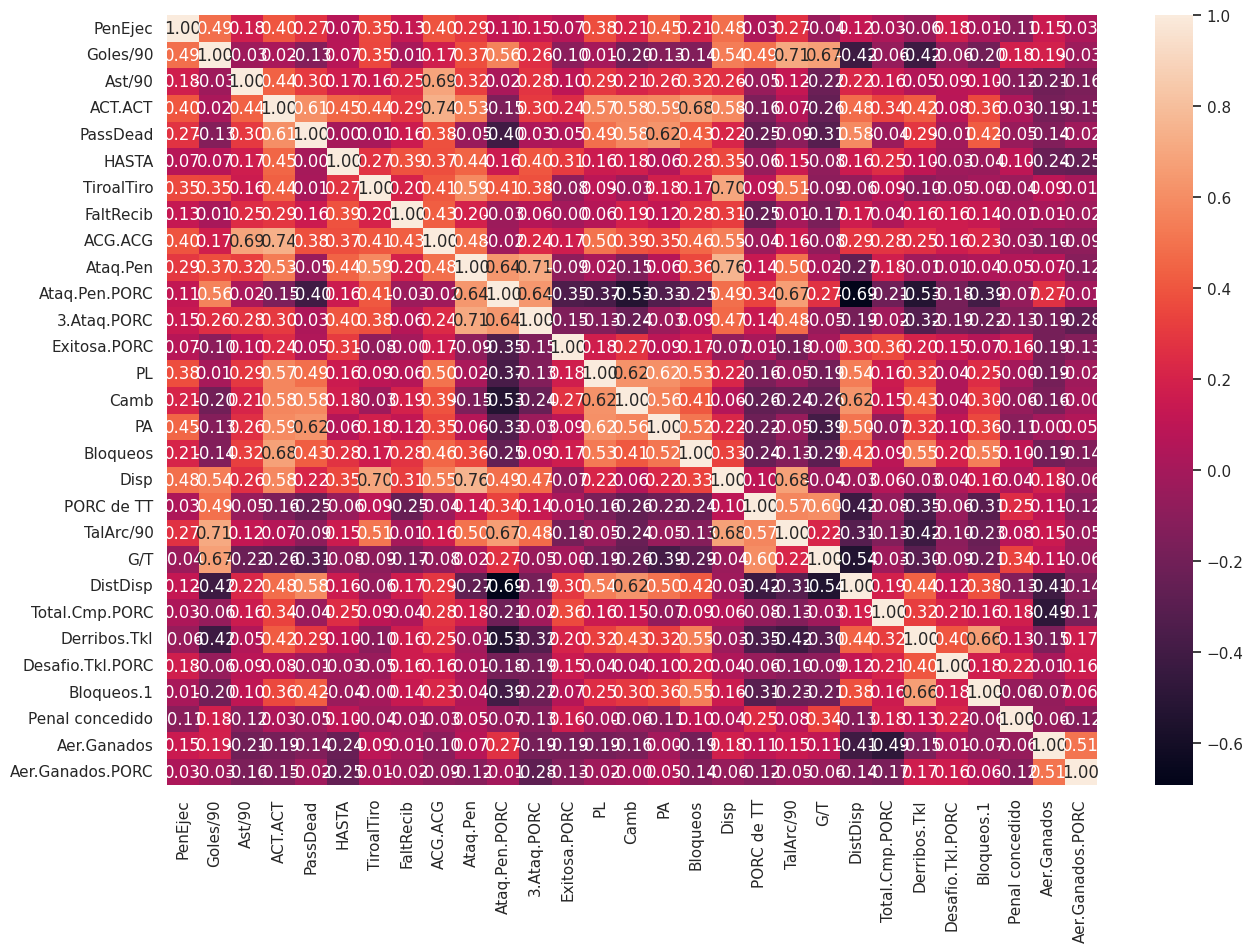

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(DL_df.corr(), annot=True, fmt='0.2f')
plt.show()

In [84]:
scaler=StandardScaler() #Proceso que hace la Estandarización. No se puede comparar datos que están con escalas distintas Con coeficiente de variación.Desviación estandar/ media.
data_scaled=pd.DataFrame(scaler.fit_transform(DL_df), columns=DL_df.columns)

In [85]:
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Random State: Semilla, voy a guardar una semilla en posición 1.
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
explained_variance_ratio_= pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio_.cumsum()

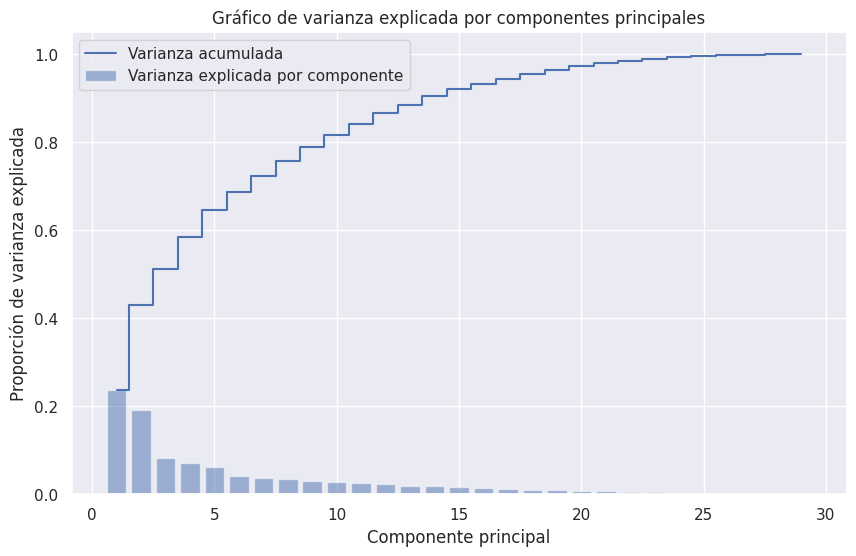

In [86]:
# Gráfico de la varianza explicada y acumulada
plt.figure(figsize=(10, 6))

# Gráfico de la varianza explicada por cada componente
plt.bar(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, alpha=0.5, align='center', label='Varianza explicada por componente')

# Gráfico de la varianza acumulada
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Varianza acumulada')

plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componente principal')
plt.legend(loc='best')
plt.title('Gráfico de varianza explicada por componentes principales')
plt.grid(True)
plt.show()

Los 20 atributos principales basados en los primeros 10 componentes de PCA ponderados por varianza explicada son:
Index(['PenEjec', 'PORC de TT', 'G/T', 'Ast/90', 'ACG.ACG', 'DistDisp',
       'HASTA', 'Camb', 'Ataq.Pen.PORC', 'Exitosa.PORC', 'Derribos.Tkl',
       'Bloqueos.1', 'Goles/90', 'ACT.ACT', 'FaltRecib'],
      dtype='object')


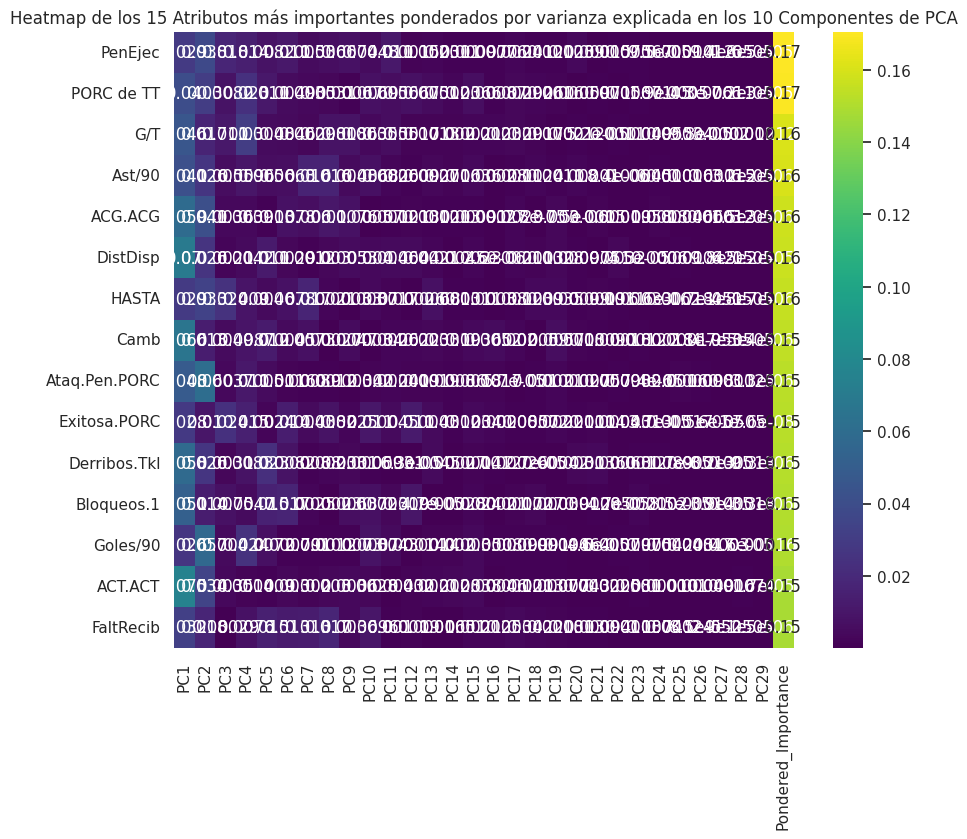

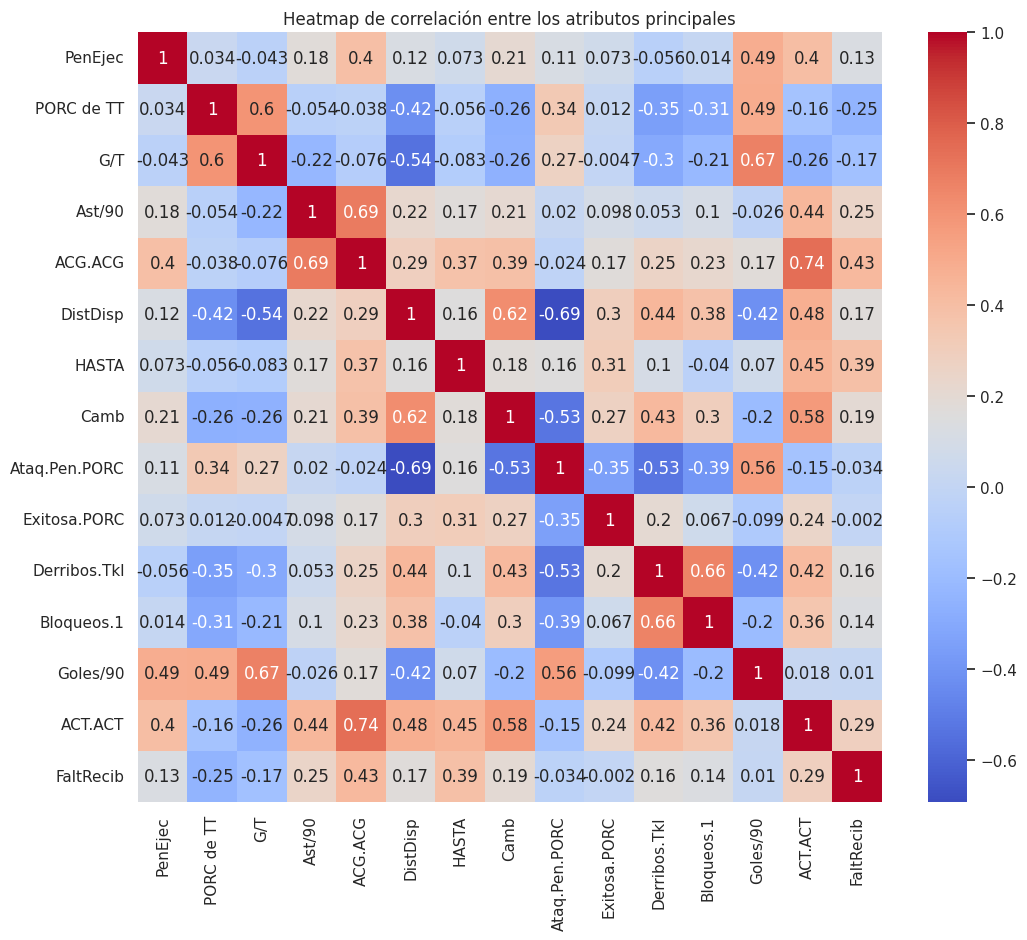

In [87]:
# Obtener las cargas de los componentes principales
loadings = pca.components_

# Obtener la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Convertir las cargas en un DataFrame
pca_loadings_df = pd.DataFrame(loadings.T,
                               columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
                               index=DL_df.columns)

# Ponderar las cargas por la varianza explicada de cada componente
for i in range(len(explained_variance_ratio)):
    pca_loadings_df[f'PC{i+1}'] = pca_loadings_df[f'PC{i+1}'] * explained_variance_ratio[i]

# Calcular la importancia ponderada total de cada atributo
pca_loadings_df['Pondered_Importance'] = pca_loadings_df.abs().sum(axis=1)

# Seleccionar los 20 atributos más importantes
top_20_attributes = pca_loadings_df['Pondered_Importance'].sort_values(ascending=False).head(15).index

# Mostrar los 20 atributos más importantes
print("Los 20 atributos principales basados en los primeros 10 componentes de PCA ponderados por varianza explicada son:")
print(top_20_attributes)

# Crear un heatmap para visualizar estos atributos en los primeros 10 componentes principales
plt.figure(figsize=(10, 8))
sns.heatmap(pca_loadings_df.loc[top_20_attributes].abs(), annot=True, cmap='viridis')
plt.title('Heatmap de los 15 Atributos más importantes ponderados por varianza explicada en los 10 Componentes de PCA')
plt.show()

# Obteniendo matriz con atributos principales
Atributos=list(top_20_attributes)

# Heatmap de los 20 atributos principales
plt.figure(figsize=(12, 10))
sns.heatmap(DL_df[Atributos].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación entre los atributos principales')
plt.show()

In [88]:

# Calcular la matriz de correlación
correlation_matrix = DL_df[Atributos].corr()

# Convertir la matriz de correlación en un DataFrame plano
correlation_df = correlation_matrix.stack().reset_index()
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Eliminar las filas donde la Variable 1 es igual a la Variable 2
correlation_df = correlation_df[correlation_df['Variable 1'] != correlation_df['Variable 2']]

# Ordenar el DataFrame por la columna 'Correlación'
correlation_df_sorted = correlation_df.sort_values('Correlación')

# Mostrar el DataFrame ordenado
print(correlation_df_sorted)


        Variable 1     Variable 2  Correlación
125  Ataq.Pen.PORC       DistDisp    -0.692338
83        DistDisp  Ataq.Pen.PORC    -0.692338
35             G/T       DistDisp    -0.543098
77        DistDisp            G/T    -0.543098
127  Ataq.Pen.PORC           Camb    -0.532660
..             ...            ...          ...
182       Goles/90            G/T     0.672656
49          Ast/90        ACG.ACG     0.692270
63         ACG.ACG         Ast/90     0.692270
73         ACG.ACG        ACT.ACT     0.741543
199        ACT.ACT        ACG.ACG     0.741543

[210 rows x 3 columns]


In [89]:

import pandas as pd
import numpy as np
# Calcula la varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio_)

# Encuentra el número mínimo de componentes necesarios para explicar al menos el 95% de la varianza
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Aplica PCA con el número de componentes seleccionado
pca_95 = PCA(n_components=n_components_95, random_state=1)
data_pca_95 = pca_95.fit_transform(data_scaled)

# Obtén los loadings (pesos de los componentes)
loadings_95 = pca_95.components_

# Crea un DataFrame con los loadings
loadings_df_95 = pd.DataFrame(loadings_95,
                              columns=DL_df.columns,
                              index=[f'PC{i+1}' for i in range(n_components_95)])

# Calcula la importancia ponderada de cada atributo
loadings_df_95['Pondered_Importance'] = loadings_df_95.abs().sum(axis=0)

# Ordena los atributos por su importancia ponderada
top_attributes_95 = loadings_df_95['Pondered_Importance'].sort_values(ascending=False).index

# Imprime los atributos que explican el 95% de la varianza
print(f"\nLos atributos que explican al menos el 95% de la varianza son:\n{top_attributes_95}")

# Puedes usar estos atributos para construir un modelo que capture la mayor parte de la variabilidad de los datos.



Los atributos que explican al menos el 95% de la varianza son:
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
      dtype='object')


In [90]:
DL_df = DL_df[Atributos]

In [91]:
DL_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 4 to 444
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PenEjec        82 non-null     int64  
 1   PORC de TT     82 non-null     float64
 2   G/T            82 non-null     float64
 3   Ast/90         82 non-null     float64
 4   ACG.ACG        82 non-null     int64  
 5   DistDisp       82 non-null     float64
 6   HASTA          82 non-null     int64  
 7   Camb           82 non-null     int64  
 8   Ataq.Pen.PORC  82 non-null     float64
 9   Exitosa.PORC   82 non-null     float64
 10  Derribos.Tkl   82 non-null     int64  
 11  Bloqueos.1     82 non-null     int64  
 12  Goles/90       82 non-null     float64
 13  ACT.ACT        82 non-null     int64  
 14  FaltRecib      82 non-null     int64  
dtypes: float64(7), int64(8)
memory usage: 10.2 KB


A partir de este DF se eliminan los atributos que tengan correlación suficiente, con otros atributos, y además se eliminan aquellas que no tengan directa relación con 'la posición de delantero'.

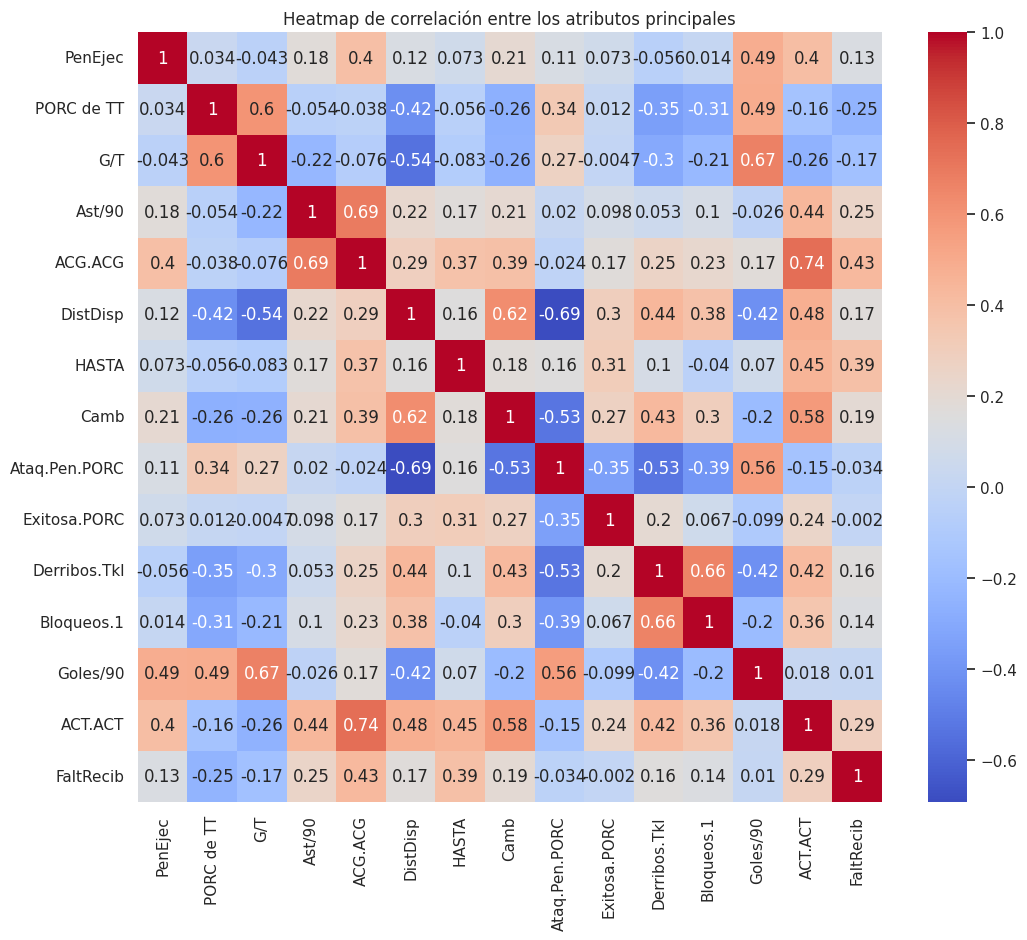

In [92]:


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(DL_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación entre los atributos principales')
plt.show()

In [93]:
DL_df = DL_df.drop(['ACT.ACT','Camb','FaltRecib','Bloqueos.1','Derribos.Tkl','PenEjec'],axis=1)
#Se elimina ACT.ACT por su alta correlación con los demás (en comparación al resto)

In [94]:
Atributos = list(DL_df.columns)

In [95]:
df_download = DL_df3[['RL'] + Atributos]
df_download.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 4 to 451
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RL             131 non-null    int64  
 1   PORC de TT     131 non-null    float64
 2   G/T            131 non-null    float64
 3   Ast/90         131 non-null    float64
 4   ACG.ACG        131 non-null    int64  
 5   DistDisp       131 non-null    float64
 6   HASTA          131 non-null    int64  
 7   Ataq.Pen.PORC  131 non-null    float64
 8   Exitosa.PORC   131 non-null    float64
 9   Goles/90       131 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 11.3 KB


In [97]:
DL_PerforMatch=df_download.copy()
#Se realiza lo mismo para los delanteros
# Descargar el DataFrame como archivo csv
df_download.to_csv('DL_Atrib.csv', index=False)
files.download('DL_Atrib.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Clusterización
Clusterización realizada mediante la metodologia K-Means para agrupar minimizando las diferencias entre los distintos jugadores.

Este procedimiento será realizado para cada posición de juego, donde se obtendrán clusters con características similares entre los jugadores, obteniendo esta clase de jugador 'tipo' para cada posición. Este resultado será mostrado al final de cada espacio de código por posición

###Defensas

In [100]:
data=DF_PerforMatch

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 454
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RL             196 non-null    int64  
 1   Att            196 non-null    int64  
 2   Rec            196 non-null    int64  
 3   Total.Intent   196 non-null    int64  
 4   Dist. tot.     196 non-null    int64  
 5   Tkl+Int        196 non-null    int64  
 6   Dist. Prg      196 non-null    int64  
 7   3. Ataq        196 non-null    int64  
 8   PrgR           196 non-null    int64  
 9   Bloqueos       196 non-null    int64  
 10  Bloqueos.1     196 non-null    int64  
 11  Recup.         196 non-null    int64  
 12  HASTA          196 non-null    int64  
 13  ACT.SCA90      196 non-null    float64
 14  Camb           196 non-null    int64  
 15  Derribos.TklG  196 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 26.0 KB


In [103]:
k_means_df = data.copy()

Number of Clusters: 1 	Average Distortion: 2351.0099554730295
Number of Clusters: 2 	Average Distortion: 1385.7053597304666
Number of Clusters: 3 	Average Distortion: 1055.3863807078287
Number of Clusters: 4 	Average Distortion: 869.5193952346561
Number of Clusters: 5 	Average Distortion: 712.6504392952198
Number of Clusters: 6 	Average Distortion: 602.9191985608785
Number of Clusters: 7 	Average Distortion: 568.0608737257361
Number of Clusters: 8 	Average Distortion: 536.984609265363
Number of Clusters: 9 	Average Distortion: 511.7368483491926
Number of Clusters: 10 	Average Distortion: 496.6866229067472
Number of Clusters: 11 	Average Distortion: 451.13939882282824
Number of Clusters: 12 	Average Distortion: 444.6392015711506
Number of Clusters: 13 	Average Distortion: 430.11110054939417
Number of Clusters: 14 	Average Distortion: 406.9353206206338


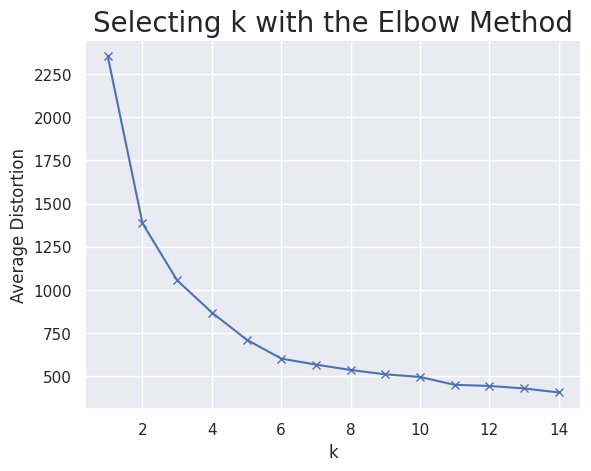

In [104]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(data)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()

In [105]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [106]:
data = data.copy()

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df["KM_segments"] = kmeans.labels_
data["KM_segments"] = kmeans.labels_

In [107]:
km_cluster_profile = data.groupby("KM_segments").mean()

In [108]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    data.groupby("KM_segments")["RL"].count().values
)

In [109]:
km_cluster_profile.style.highlight_max(color = "red", axis = 0)

In [111]:
for cluster_num, rl_list in data.groupby('KM_segments')['RL'].apply(list).items(): # Changed data('KM_segments') to data.groupby('KM_segments')
  print(f"Cluster {cluster_num}:")
  for rl_value in rl_list:
    print(rl_value)
  print("\n")

Cluster 0:
1
14
24
34
35
41
45
48
60
68
71
77
82
83
85
99
100
102
110
111
119
125
137
144
150
158
166
167
171
175
177
182
186
200
203
205
225
229
234
236
238
239
251
259
260
268
270
274
277
280
285
292
296
298
299
305
306
310
312
324
328
332
337
344
347
350
352
357
358
361
367
372
373
380
383
394
396
400
405
409
410
412
413
420
421
446
447
452
456
462
488
494
495
510
513
514
517
518
532
533
541
551
571


Cluster 1:
15
25
142
147
161
218
231
284
289
458
464
471
481
485
492
522
538
549
575


Cluster 2:
5
8
11
12
13
16
18
38
49
52
62
67
69
72
86
92
94
96
97
112
113
117
120
126
133
135
145
146
156
176
208
209
219
221
222
244
252
271
282
288
302
304
307
308
319
320
349
354
370
391
395
417
432
434
435
443
457
459
487
504
508
512
530
535
539
542
547
550
556
561
563
574
578
579




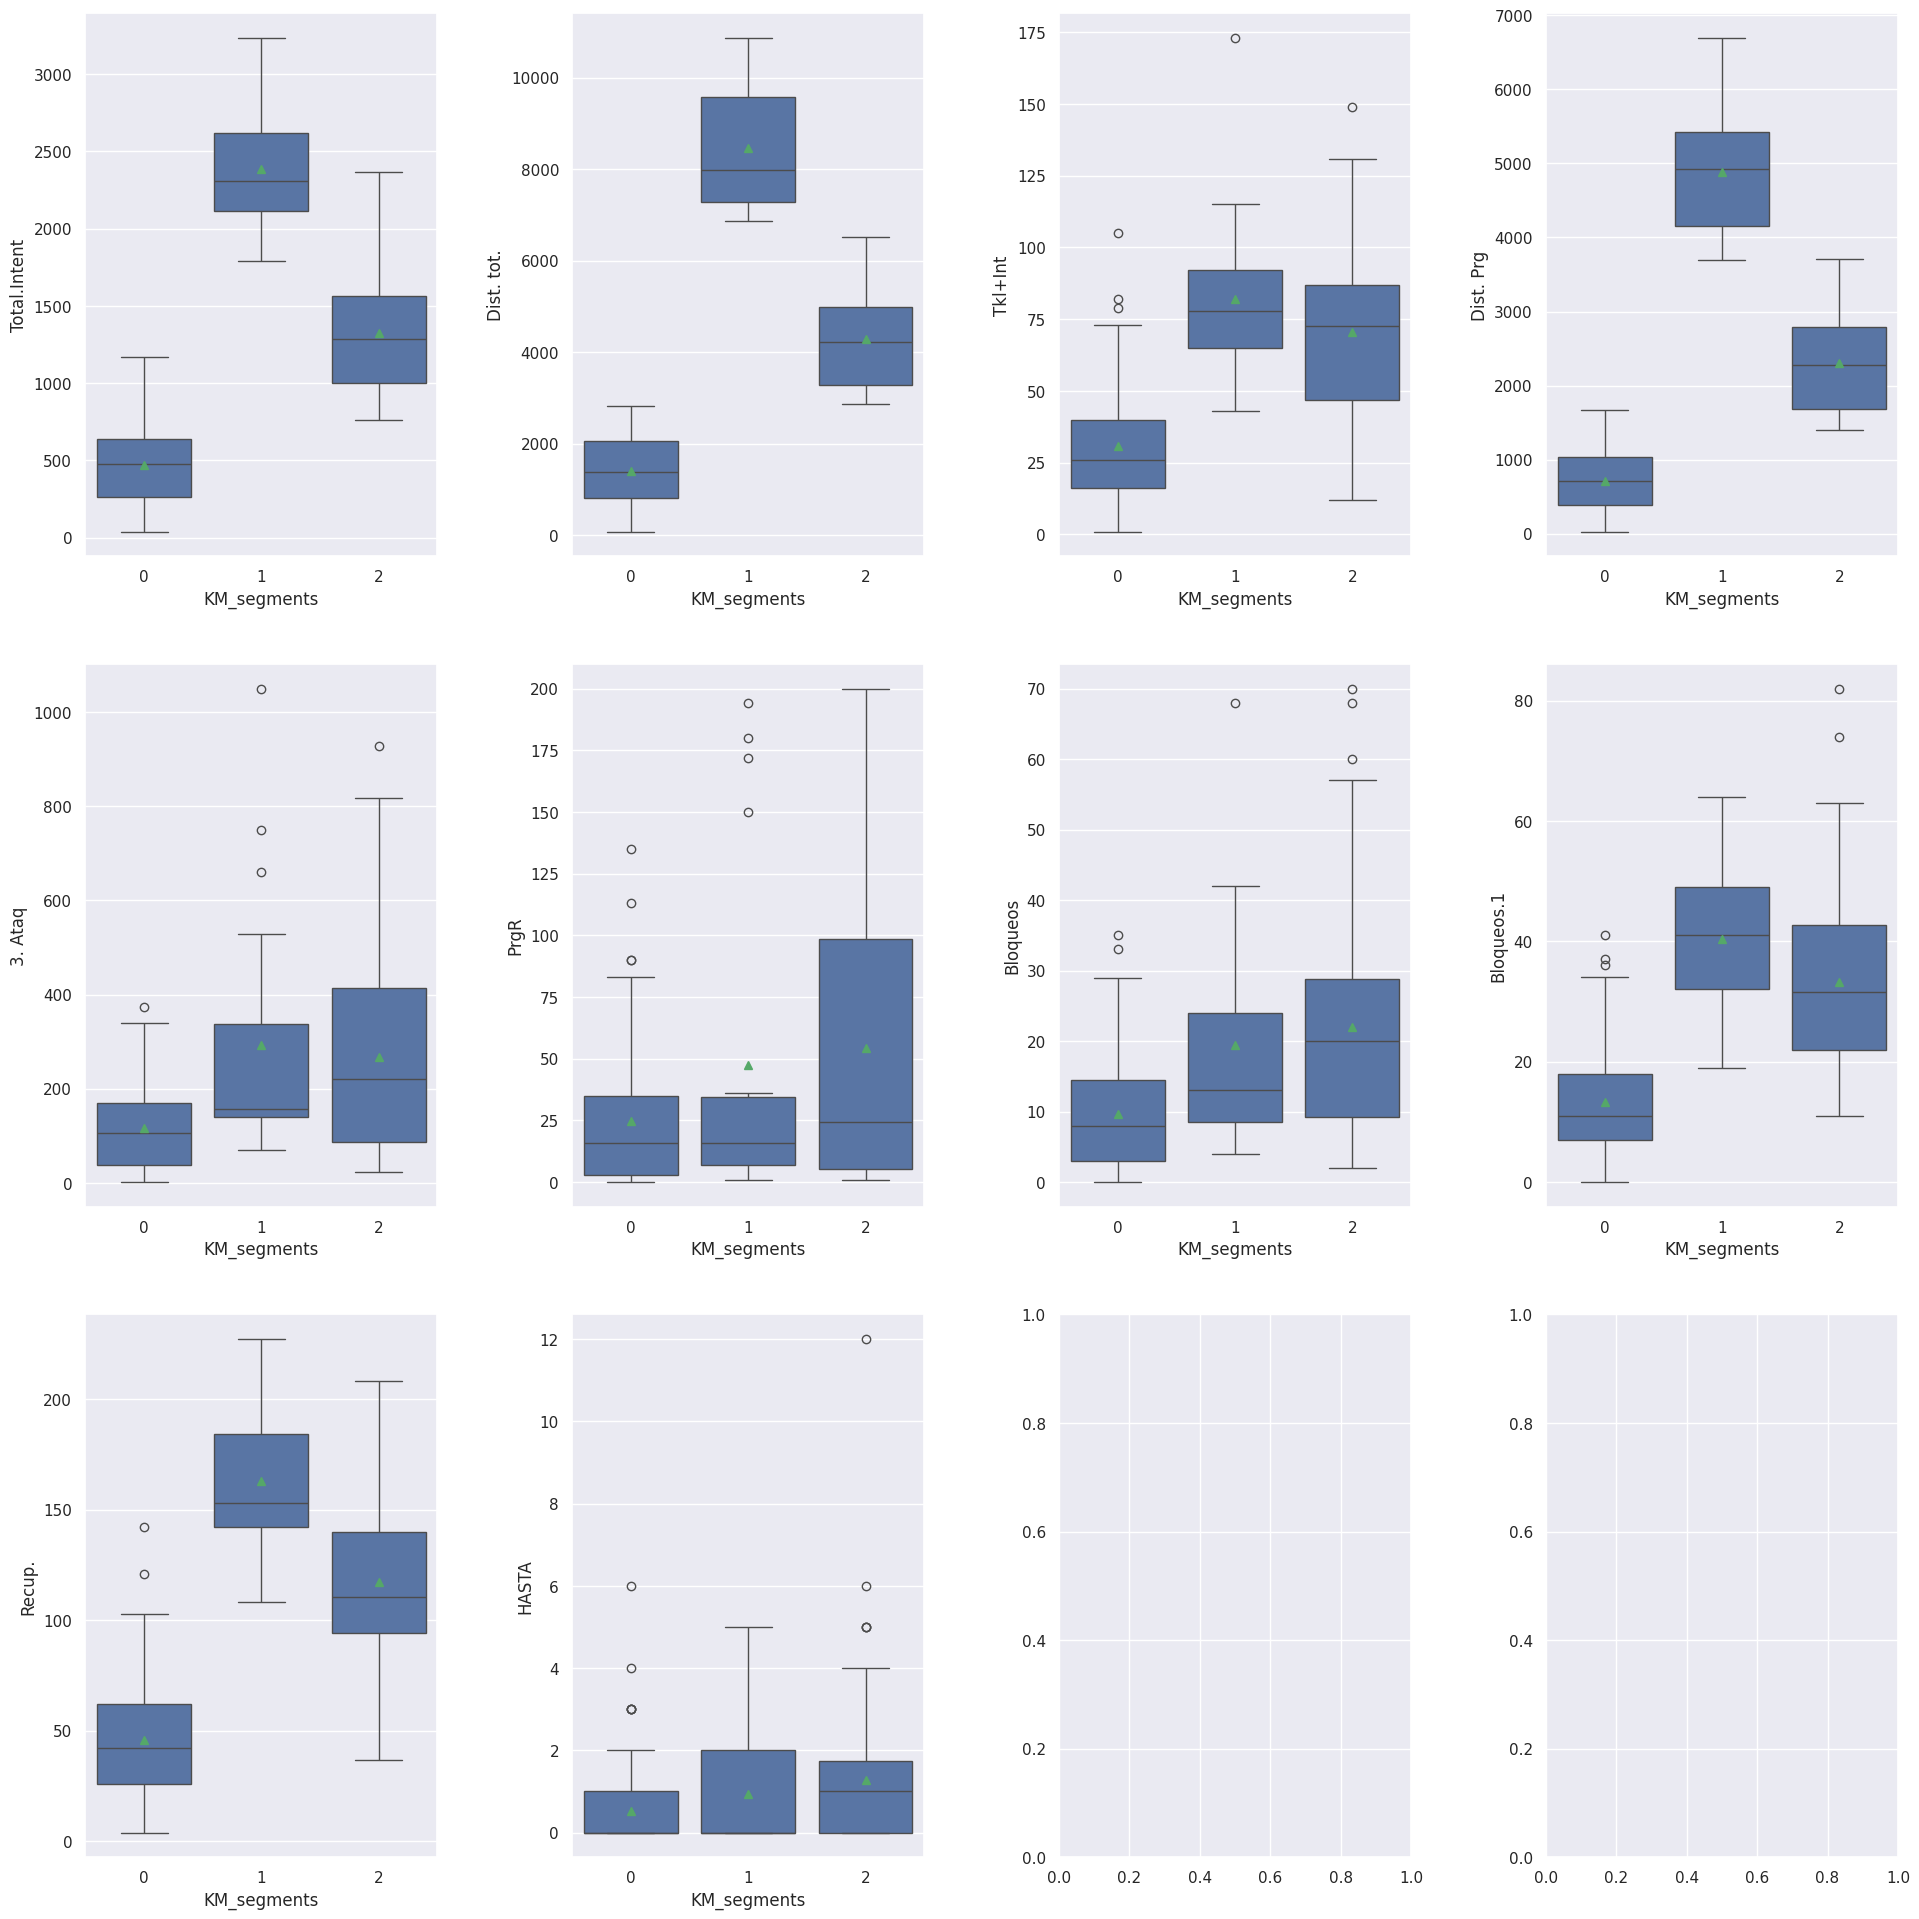

In [112]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = data,
                y = data.columns[3 + counter],
                x = "KM_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

In [124]:

# Assuming 'data' is your DataFrame and 'km_cluster_profile' is already defined
combined_df = pd.merge(data, km_cluster_profile, on='KM_segments', suffixes=('', '_cluster_mean'))

# Download the combined DataFrame as a CSV file
combined_df.to_csv('DF_Cluster_PerforMatch.csv', index=False)
files.download('DF_Cluster_PerforMatch.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

I. Defensas:

0. **Defensores Equilibrados**:

Este grupo mantiene valores moderados en casi todos los atributos sin mostrar grandes picos.
Los valores de recuperación, bloqueos y acciones defensivas son balanceados, lo que sugiere un
estilo defensivo versátil sin una especialización clara en ataque o defensa.
Pueden adaptarse bien en esquemas donde se requiere un balance entre la defensa y la cobertura
de espacios.

1. **Defensores de Recuperación y Presión Intensa**:

Este cluster destaca en atributos como ‘Rec’, ‘Total.Intent’, ‘Dist. tot.’, y ‘Recup’, lo cual indica
que estos jugadores son intensivos en recuperar la posesión y en interceptar pases. También
tienen un alto número de ‘Derribos.TklG’, lo que sugiere que son efectivos en la recuperación de
la posesión y en la presión sobre el oponente.

Los defensores en este cluster son muy activos en la presión y en la recuperación de la posesión.
Se dedican a interceptar y cortar el juego del oponente, cubren grandes distancias, y son eficaces
en ganar balones divididos. Son ideales para equipos que juegan con una defensa avanzada o
presionan al rival en su propio campo.

2. **Defensores de Bloqueo y Presencia Ofensiva**:

En este grupo destacan los valores en ‘Att’, ‘PrgR’, ‘Bloqueos’, y ‘HASTA’, lo que indica un
perfil de defensa que no solo bloquea bien, sino que también tiene presencia en el ataque. Estosjugadores tienden a involucrarse en situaciones de ataque (presencia en el tercio ofensivo) y
reciben pases progresivos, lo cual es poco común en defensores más estáticos.

Los defensores de este cluster no solo son buenos en bloquear y cortar ataques, sino que también
participan activamente en la fase ofensiva. Suelen recibir pases progresivos y contribuyen a las
jugadas de ataque, lo que los convierte en una opción valiosa para equipos que buscan defensores
con capacidad de transición y presencia ofensiva.

###Mediocentros

In [114]:
data=MC_PerforMatch

In [115]:
k_means_df = data.copy()

Number of Clusters: 1 	Average Distortion: 584.9505975573351
Number of Clusters: 2 	Average Distortion: 362.05565360817127
Number of Clusters: 3 	Average Distortion: 267.75817158272247
Number of Clusters: 4 	Average Distortion: 226.53404333062073
Number of Clusters: 5 	Average Distortion: 196.73585505083582
Number of Clusters: 6 	Average Distortion: 180.4997033254146
Number of Clusters: 7 	Average Distortion: 174.01257996155044
Number of Clusters: 8 	Average Distortion: 160.36557800188174
Number of Clusters: 9 	Average Distortion: 150.81378757115016
Number of Clusters: 10 	Average Distortion: 142.17509327191456
Number of Clusters: 11 	Average Distortion: 133.91478194478213
Number of Clusters: 12 	Average Distortion: 127.95154570925095
Number of Clusters: 13 	Average Distortion: 113.67736114867246
Number of Clusters: 14 	Average Distortion: 110.06084185671679


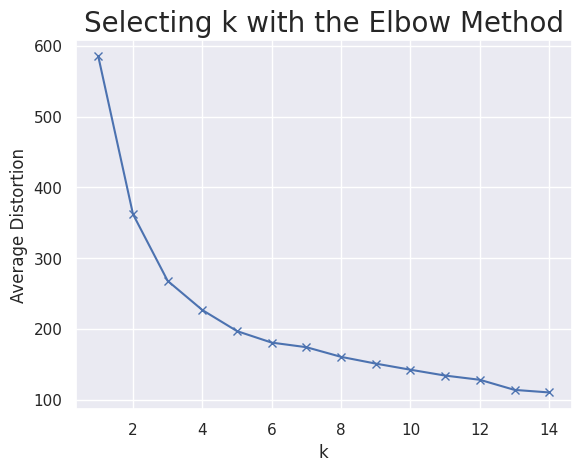

In [116]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(data)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()

In [117]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [118]:
data = data.copy()

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df["KM_segments"] = kmeans.labels_
data["KM_segments"] = kmeans.labels_

In [119]:
km_cluster_profile = data.groupby("KM_segments").mean()

In [120]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    data.groupby("KM_segments")["RL"].count().values
)

In [121]:
km_cluster_profile.style.highlight_max(color = "red", axis = 0)

In [122]:

# Assuming 'data' is your DataFrame and it contains a column named 'RL' and 'KM_segments'
rl_by_cluster = data.groupby('KM_segments')['RL'].apply(list)

for cluster, rl_list in rl_by_cluster.items():
  print(f"Cluster {cluster}:")
  for rl in rl_list:
    print(rl)
  print("\n")

Cluster 0:
64
88
185
196
204
220
313
316
451
460
580


Cluster 1:
21
46
59
80
89
106
114
121
173
199
207
226
242
254
273
291
301
311
317
330
389
401
414
425
500
501
506
552


Cluster 2:
30
42
56
63
109
124
127
128
136
155
157
174
197
215
241
265
266
309
314
321
322
351
374
384
386
406
445
466
472
476
483
527
559
572
573




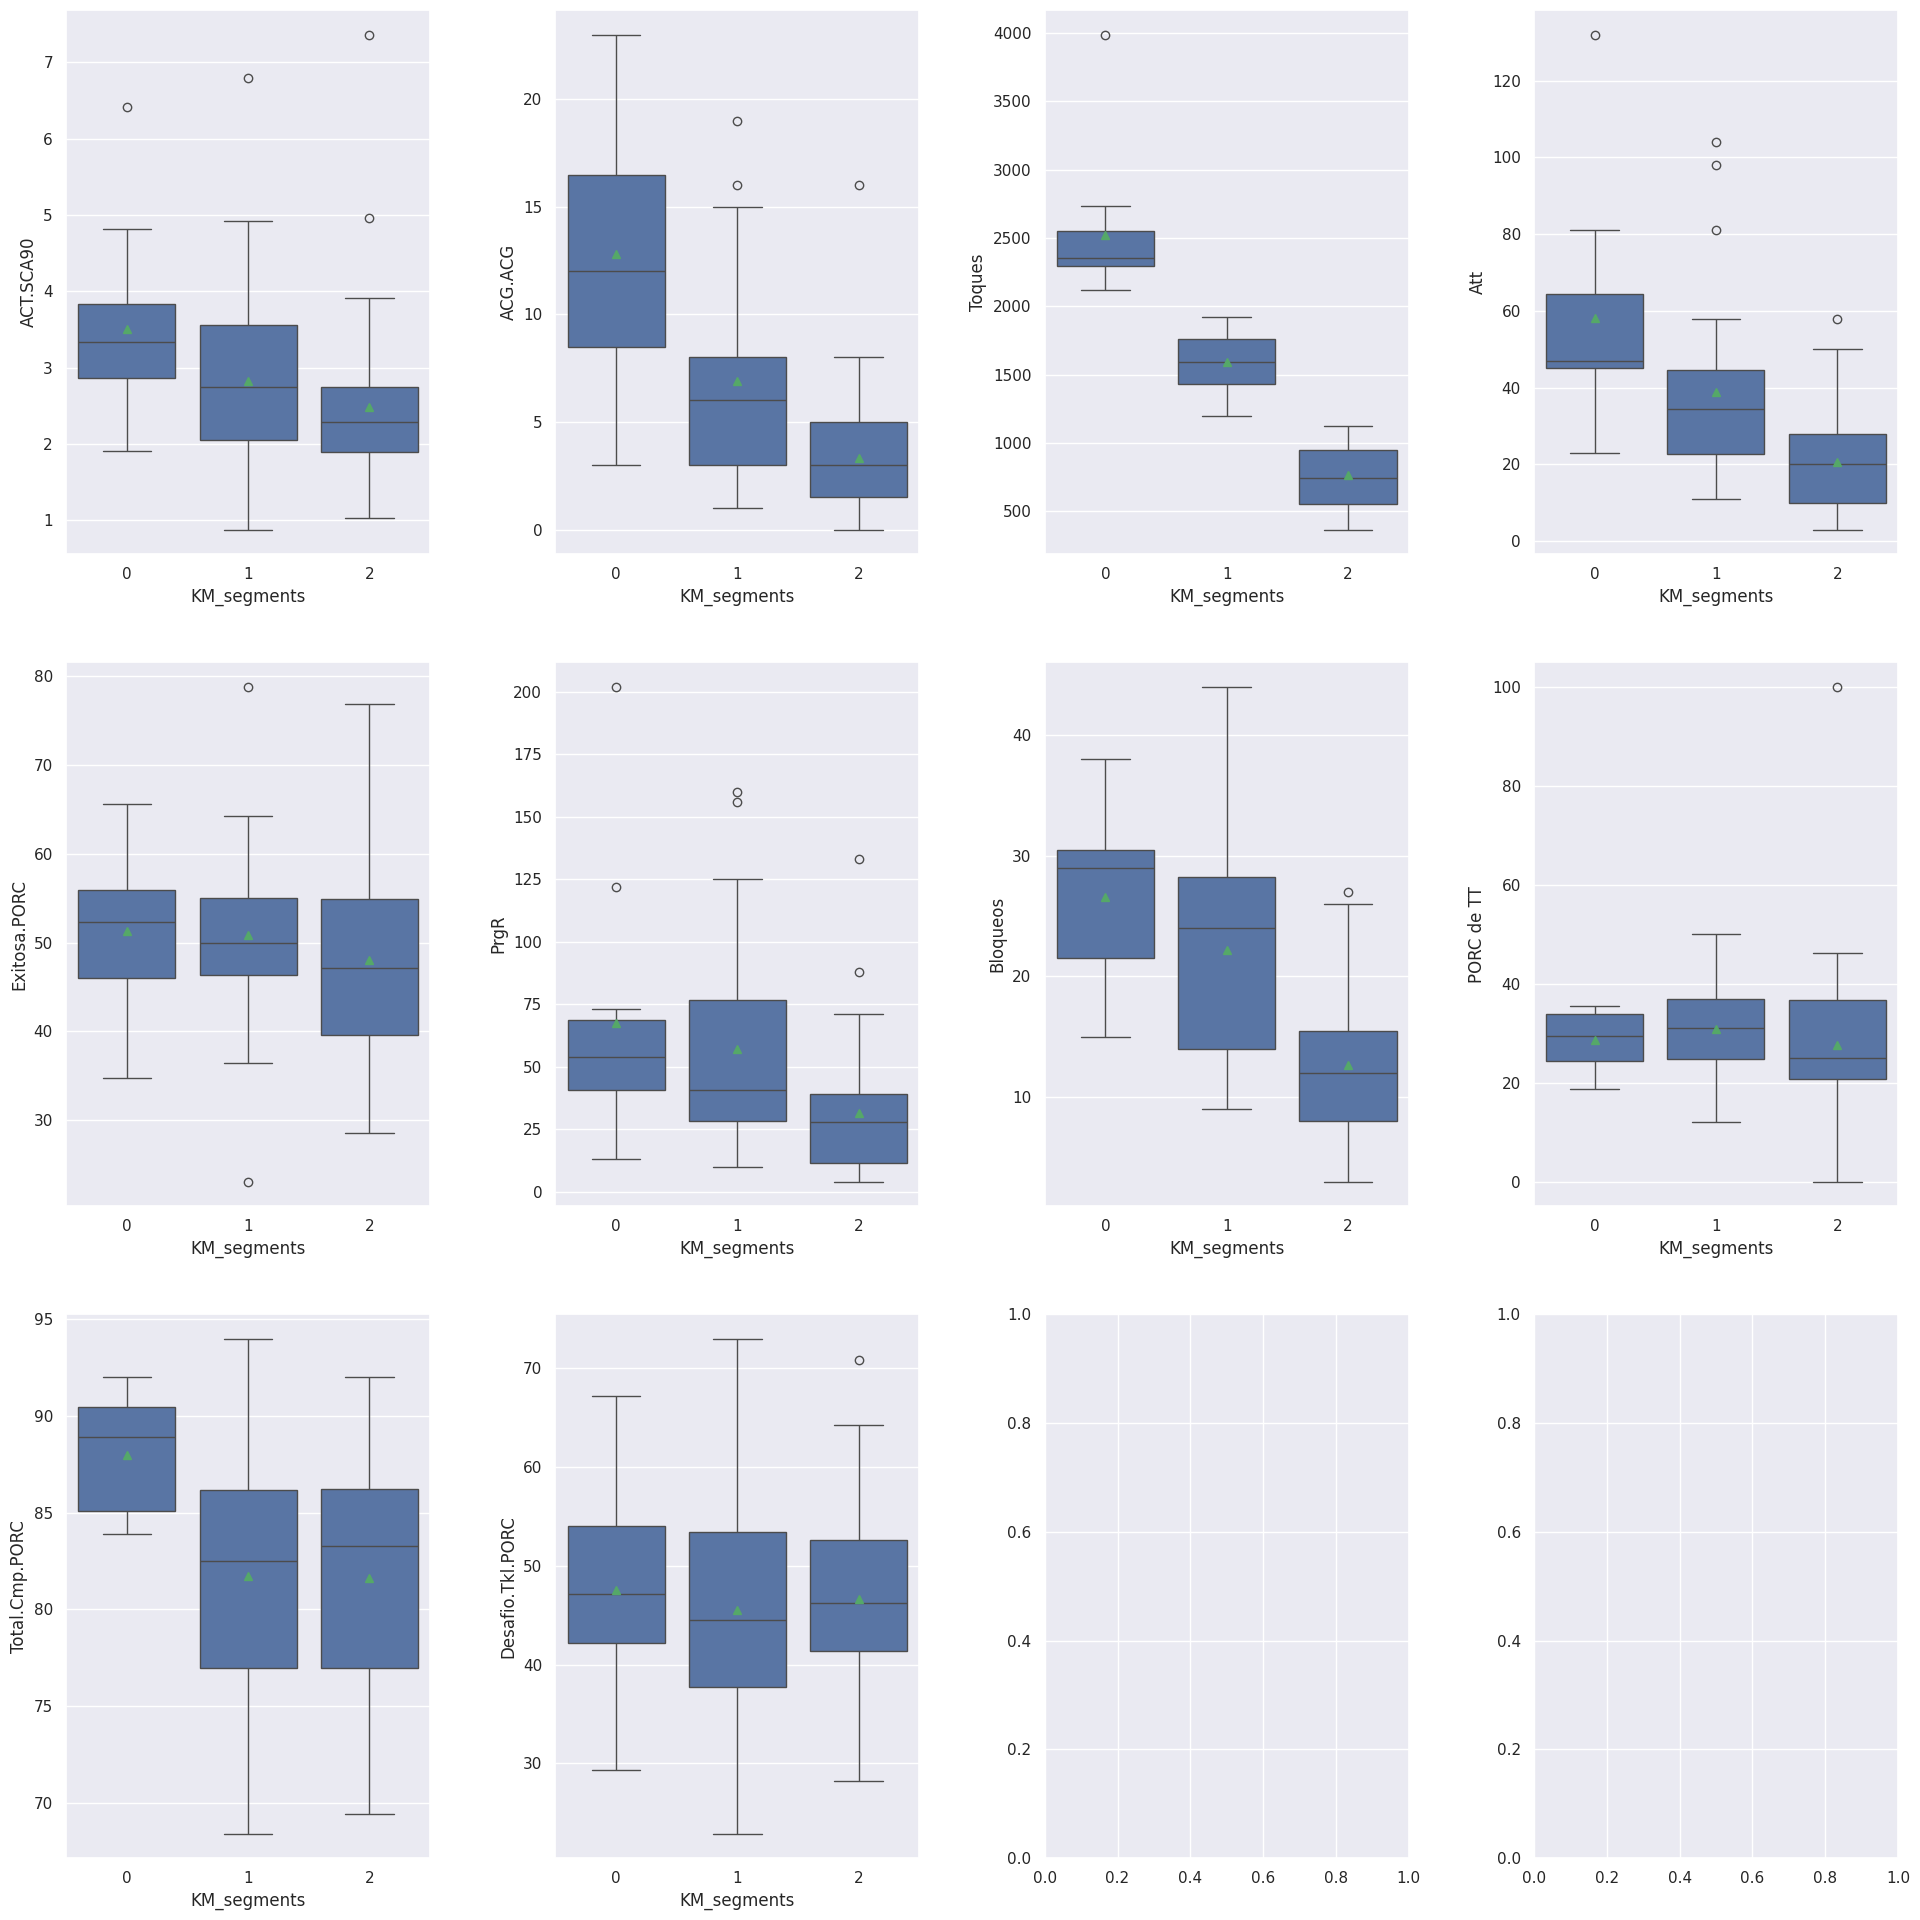

In [125]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = data,
                y = data.columns[3 + counter],
                x = "KM_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

In [126]:

# Assuming 'data' is your DataFrame and it contains a column named 'KM_segments'
# You can modify the filename if needed
data.to_csv('MC_Cluster_PerforMatch.csv', index=False)

# Download the file
from google.colab import files
files.download('MC_Cluster_PerforMatch.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

II. Mediocampistas:

0. **Mediocampista de creación y posesión alta**:

Este grupo de mediocampistas tiene los valores más altos en la mayoría de los atributos
relacionados con la posesión, la creación de oportunidades y la progresión del balón. Destacan en
acciones como "ACT.SCA90", "Toques", "Att" y en el porcentaje de tomas exitosas
("Exitosa.PORC"), lo que resalta su habilidad para mantener el control y dinamizar el juego.

Estos mediocampistas están enfocados en construir juego y retener la posesión, participando
activamente en el campo y proporcionando una fuerte presencia ofensiva. Son jugadores que
controlan el ritmo del partido, creando oportunidades y aportando fluidez al ataque de su equipo.
1. **Mediocampista mixto**:

Este grupo de mediocampistas mixtos mantiene un equilibrio en las métricas de creación y
defensa, destacando en eficiencia de retención de balón en los duelos, con el valor más alto en el
"PORC de TT". Esto sugiere que son jugadores sólidos tanto en contribuciones ofensivas como
defensivas.

Con buenos números en creación de oportunidades (aunque menores en comparación con el
Clúster 0) y habilidades defensivas como "Bloqueos" y "Desafio.Tkl.PORC", estos
mediocampistas cumplen un rol de "box-to-box". Ayudan en la transición y cubren ambos
extremos del campo, aportando tanto en la construcción de juego como en la recuperación del
balón.
2. **Mediocampista defensivo o de contención**:

Este grupo de mediocampistas defensivos o de contención presenta los valores más bajos en
creación y posesión, pero un buen equilibrio en métricas defensivas, como el
"Desafio.Tkl.PORC". Esto indica que, aunque su participación en acciones de ataque y creación
es limitada, su enfoque está en labores defensivas clave.

Estos jugadores se especializan en interrumpir los ataques rivales y proteger la defensa,
contribuyendo con acciones que ayudan a mantener la solidez en la última línea.

###Delanteros

In [127]:
dataDL = DL_PerforMatch
dataDL_copy=dataDL.copy()
dataDL=dataDL.drop('RL',axis=1)

In [128]:
k_means_df = dataDL.copy()

In [129]:
dataDL_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 4 to 451
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RL             131 non-null    int64  
 1   PORC de TT     131 non-null    float64
 2   G/T            131 non-null    float64
 3   Ast/90         131 non-null    float64
 4   ACG.ACG        131 non-null    int64  
 5   DistDisp       131 non-null    float64
 6   HASTA          131 non-null    int64  
 7   Ataq.Pen.PORC  131 non-null    float64
 8   Exitosa.PORC   131 non-null    float64
 9   Goles/90       131 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 11.3 KB


Number of Clusters: 1 	Average Distortion: 14.118602118704173
Number of Clusters: 2 	Average Distortion: 12.183126777113715
Number of Clusters: 3 	Average Distortion: 10.65791122926126
Number of Clusters: 4 	Average Distortion: 10.144957846191026
Number of Clusters: 5 	Average Distortion: 9.452286713754367
Number of Clusters: 6 	Average Distortion: 8.717372537459157
Number of Clusters: 7 	Average Distortion: 8.450934634419648
Number of Clusters: 8 	Average Distortion: 8.136211557613402
Number of Clusters: 9 	Average Distortion: 7.909485356707515
Number of Clusters: 10 	Average Distortion: 7.628815217170054
Number of Clusters: 11 	Average Distortion: 7.37398086752105
Number of Clusters: 12 	Average Distortion: 7.238016861349482
Number of Clusters: 13 	Average Distortion: 7.096159924441534
Number of Clusters: 14 	Average Distortion: 6.918464900507783


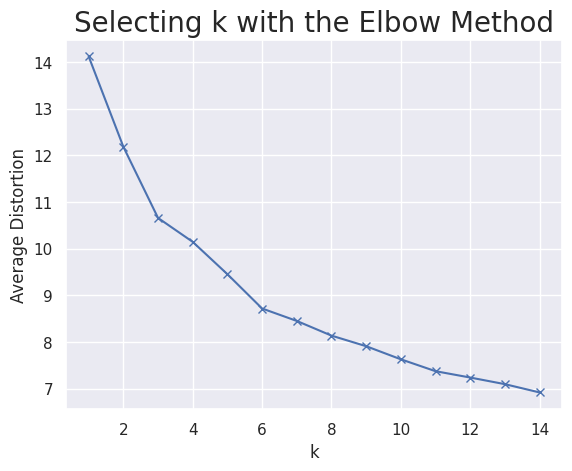

In [130]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(dataDL)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize = 20)
plt.show()

In [131]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [132]:
data = dataDL.copy()

# Adding K-Means cluster labels to the K-Means and original dataframes
k_means_df["KM_segments"] = kmeans.labels_
data["KM_segments"] = kmeans.labels_

In [133]:
km_cluster_profile = data.groupby("KM_segments").mean()

In [134]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    #data.groupby("KM_segments")["RL"].count().values
    data.groupby("KM_segments")["PORC de TT"].count().values
)


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 4 to 451
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PORC de TT     131 non-null    float64
 1   G/T            131 non-null    float64
 2   Ast/90         131 non-null    float64
 3   ACG.ACG        131 non-null    int64  
 4   DistDisp       131 non-null    float64
 5   HASTA          131 non-null    int64  
 6   Ataq.Pen.PORC  131 non-null    float64
 7   Exitosa.PORC   131 non-null    float64
 8   Goles/90       131 non-null    float64
 9   KM_segments    131 non-null    int32  
dtypes: float64(7), int32(1), int64(2)
memory usage: 10.7 KB


In [136]:
km_cluster_profile.style.highlight_max(color = "red", axis = 0)

In [137]:
data['RL'] = dataDL_copy['RL']

# Move the 'RL' column to the first position
cols = data.columns.tolist()
cols = ['RL'] + [col for col in cols if col != 'RL']
data = data[cols]


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 4 to 451
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RL             131 non-null    int64  
 1   PORC de TT     131 non-null    float64
 2   G/T            131 non-null    float64
 3   Ast/90         131 non-null    float64
 4   ACG.ACG        131 non-null    int64  
 5   DistDisp       131 non-null    float64
 6   HASTA          131 non-null    int64  
 7   Ataq.Pen.PORC  131 non-null    float64
 8   Exitosa.PORC   131 non-null    float64
 9   Goles/90       131 non-null    float64
 10  KM_segments    131 non-null    int32  
dtypes: float64(7), int32(1), int64(3)
memory usage: 11.8 KB


In [139]:
for cluster_num, rl_list in data.groupby('KM_segments')['RL'].apply(list).items(): # Changed data('KM_segments') to data.groupby('KM_segments')
  print(f"Cluster {cluster_num}:")
  for rl_value in rl_list:
    print(rl_value)
  print("\n")

Cluster 0:
6
7
23
28
36
37
47
58
70
73
84
90
122
129
132
139
165
168
181
183
192
206
223
230
235
243
256
261
267
286
294
306
324
326
331
335
341
346
355
366
387
411
453
470
478
482
486
503
521
555
557
566
568
569
576


Cluster 1:
20
26
29
31
53
55
61
75
79
81
105
152
162
198
201
217
228
257
260
287
295
296
338
339
345
363
381
407
412
439
440
448
498
511
558


Cluster 2:
22
39
143
151
154
169
172
178
184
188
195
212
232
240
247
249
250
255
258
293
318
343
362
365
372
379
393
398
415
418
441
461
463
469
490
493
515
523
531
564
567




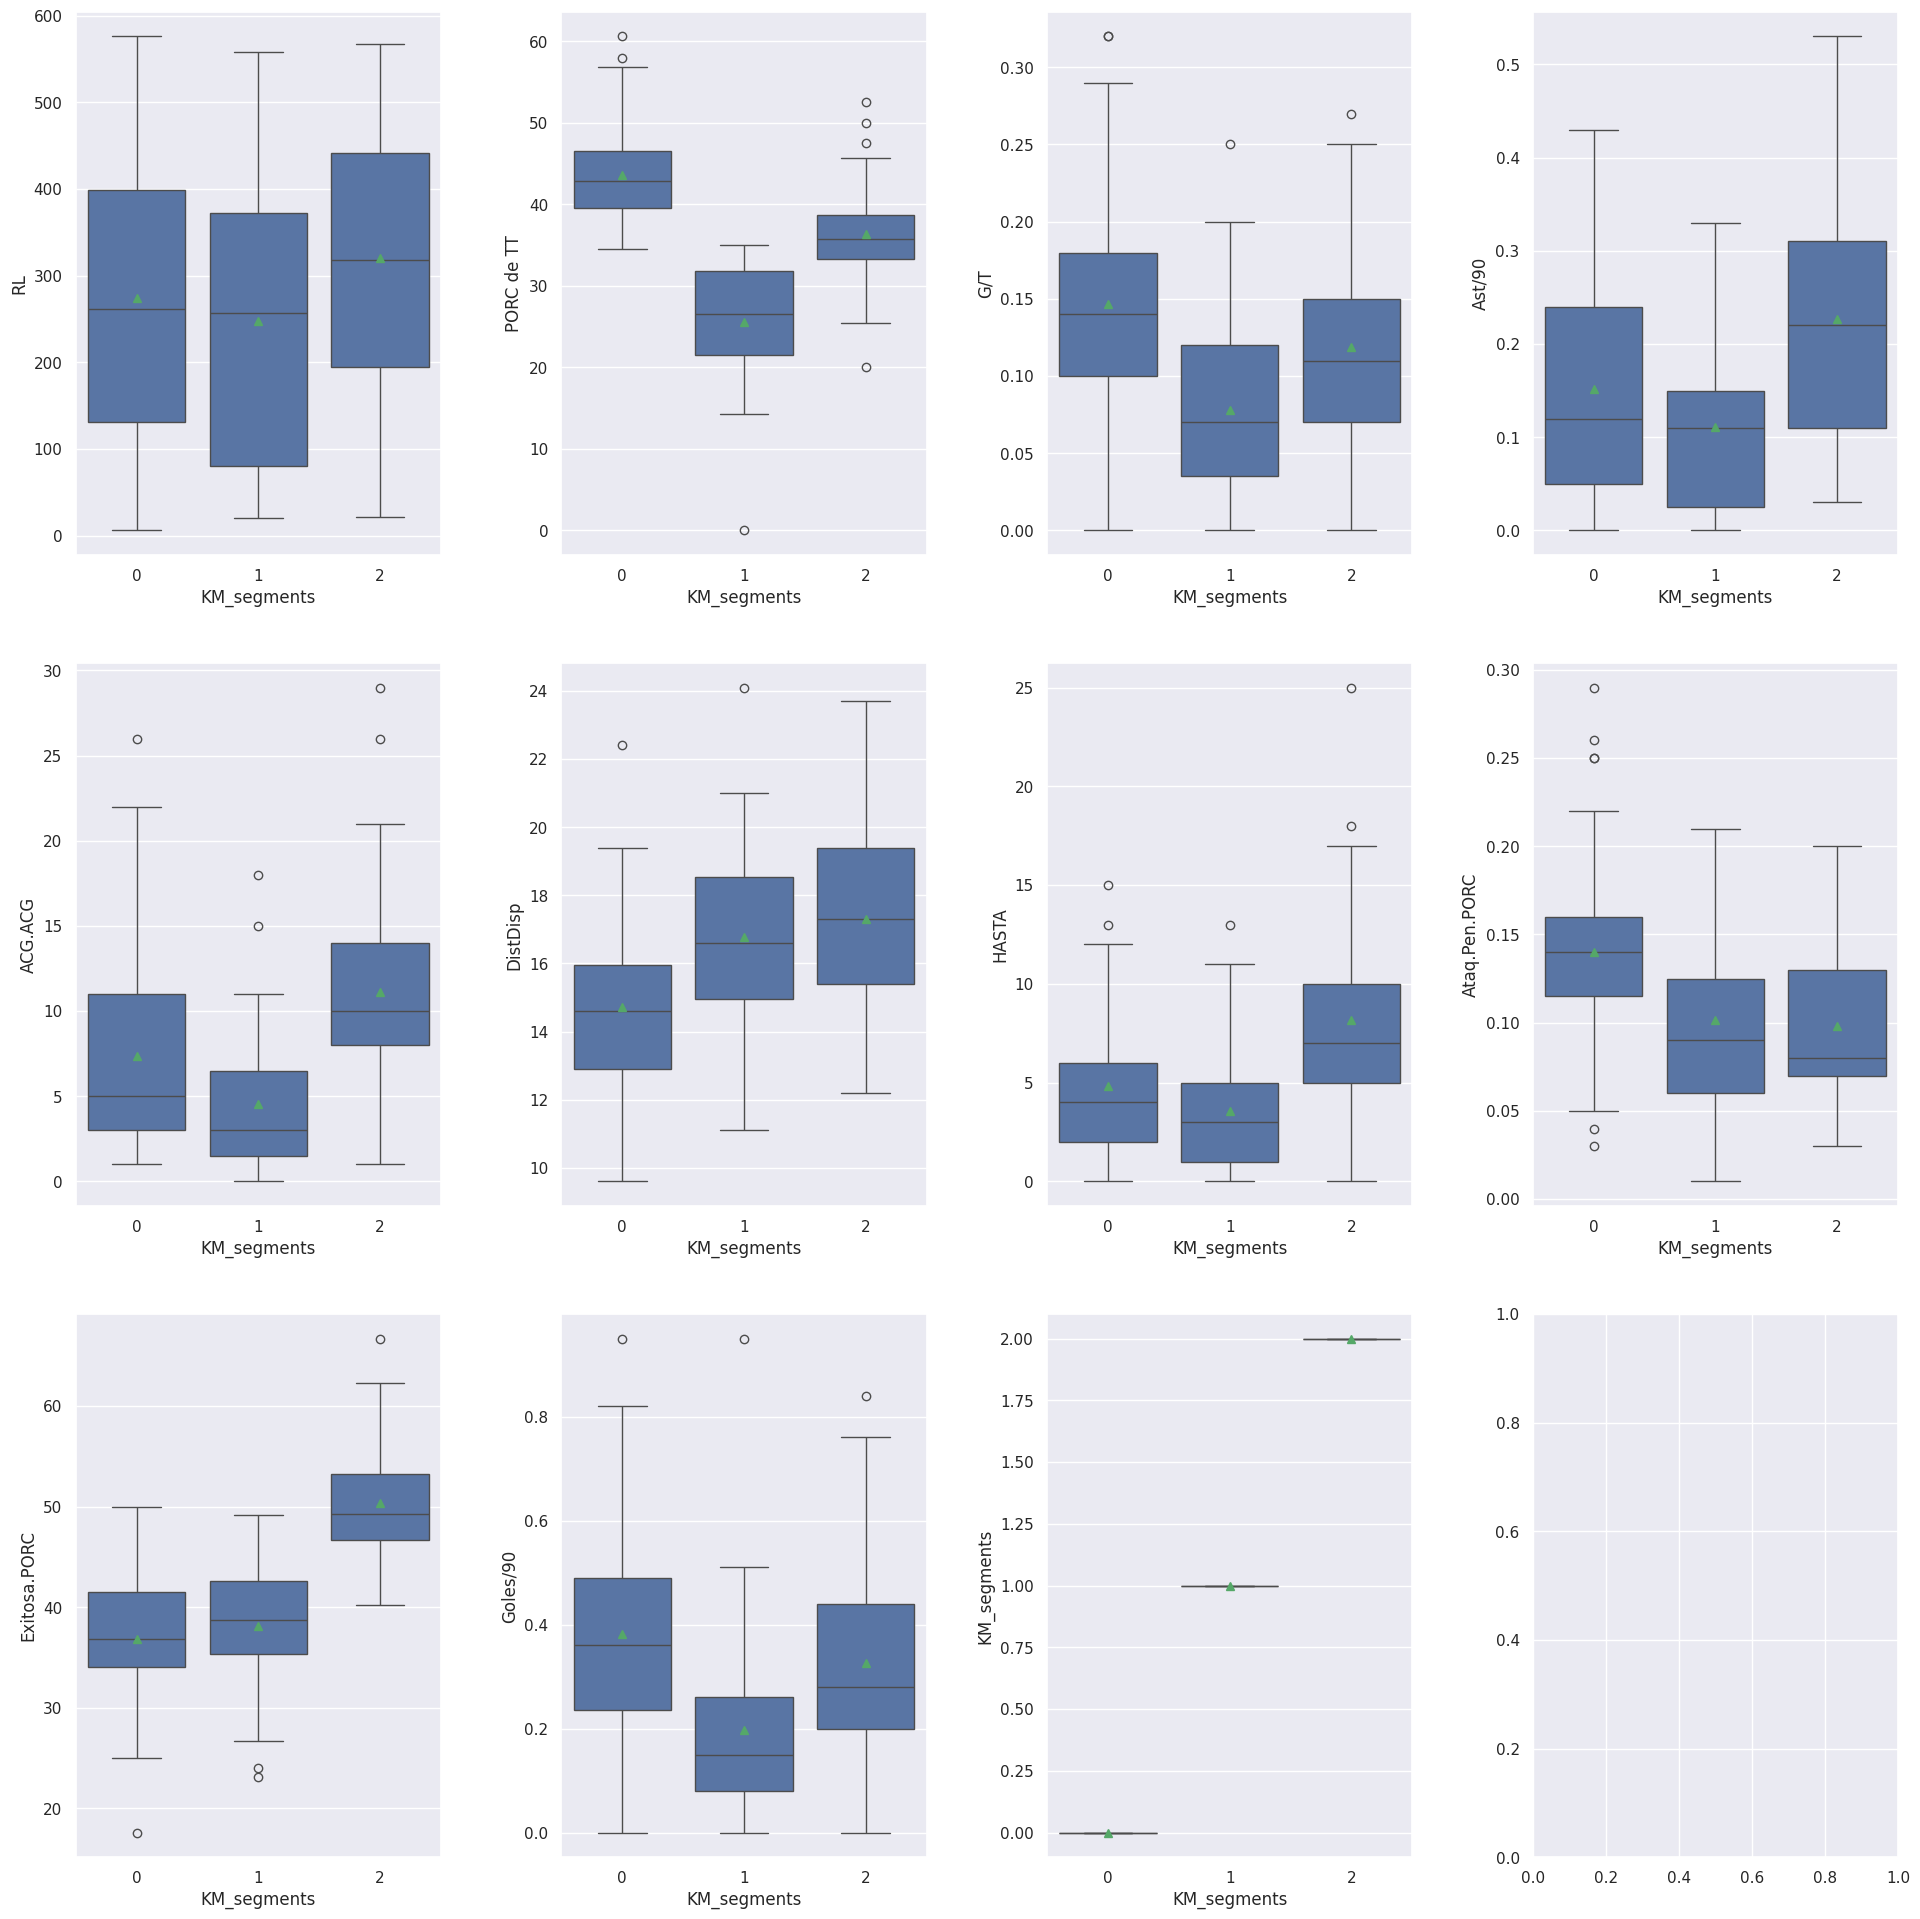

In [140]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        # Check if counter is less than the number of columns available for plotting
        # Total columns - 3 (initial skip) - 1 (adjust for 0-based indexing)
        if counter < len(data.columns):
            sns.boxplot(
                ax = axes[ii][jj],
                data = data,
                y = data.columns[counter],
                x = "KM_segments", showmeans = True
            )
            counter = counter + 1
        else:
            break

fig.tight_layout(pad = 3.0)

In [141]:
data.to_csv('DL_Cluster_PerforMatch.csv', index=False)

# Download the file
files.download('DF_Cluster_PerforMatch.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

III. Delanteros:

0. **Delanteros Finalizadores Eficientes**:

Este grupo de delanteros tiende a especializarse en la finalización de jugadas. Son jugadores que
buscan posiciones favorables cerca de la portería para rematar (Ataq.Pen.PORC), y convierten
sus oportunidades en goles con frecuencia (PORC de TT, G/T, Goles/90). Idealmente, son la
referencia en el área y no se enfocan tanto en la creación de juego, sino en el remate.
1. **Delanteros Equilibrados**:

Los jugadores en este cluster representan un perfil equilibrado y polivalente. Su estilo de juego
podría considerarse adaptable o "todo terreno," ya que no se enfocan en ninguna tarea específica,
donde podría ser útil en sistemas donde se requiere un jugador que realice funciones diversas en
el ataque sin tener una misión principal, pudiendo servir de apoyo en diferentes roles,
participando en la presión ofensiva, manteniendo la posesión en zonas de ataque, y
contribuyendo ocasionalmente con disparos o pases, aunque sin mucha precisión o frecuencia
destacada.
2. **Delanteros Regateadores y Creadores de Oportunidades**:

Los delanteros en este clúster tienen las asistencias más altas por cada 90 minutos (Ast/90), lo
que los convierte en los mejores generadores de oportunidades para sus compañeros. Además,
presentan el mayor valor en acciones para la creación de goles (ACG.ACG), lo que destaca su
participación activa en la construcción de jugadas que terminan en gol. Su porcentaje de tomas
exitosas también es el más alto (Exitosa.PORC) , lo que indica una gran habilidad en el regate y
una destacada capacidad para superar a defensores. Asimismo, poseen un valor alto en tomas
exitosas que conducen a intentos de disparo (HASTA), lo que resalta su capacidad de generar
situaciones de disparo mediante acciones individuales.

Este tipo de delanteros son regateadores y creadores de oportunidades. Su estilo se basa en
superar defensores, crear espacios y generar opciones de gol tanto para ellos como para sus
compañeros. Estos jugadores destacan por su capacidad de dribleo y su contribución creativa,
siendo ideales para equipos que buscan delanteros capaces de romper defensas y facilitar la
creación de oportunidades.

# Conclusión

El presente proyecto de Data Science logró cumplir con el objetivo principal de clusterizar a los jugadores de la Premier League (temporada 2023-2024) según sus características clave de rendimiento y posición, empleando la metodología de K-Means. Este trabajo incluyó dos etapas fundamentales:  
1. **Preprocesamiento de Datos**, donde se efectuó la limpieza, transformación y análisis exploratorio de las variables recolectadas para garantizar su calidad.  
2. **Algorithms**, donde se llevó a cabo la implementación del método K-Means mediante el cual se identificaron grupos representativos que reflejan diferentes estilos de juego.  

Gracias a los datos obtenidos de **FBREF.com**, fuente reconocida en estadísticas deportivas, desarrollamos un sistema capaz de ofrecer a los clubes información detallada sobre los perfiles de los jugadores. Esta herramienta puede ser clave en la toma de decisiones estratégicas, como la selección de fichajes, evitando errores como la compra de jugadores sobrevalorados o aquellos que no se ajustan a las necesidades específicas del equipo.  

Además, este proyecto nos permitió profundizar en el estudio de técnicas de clusterización en Machine Learning, fortaleciendo nuestros conocimientos y habilidades prácticas en el uso de K-Means.  

Esperamos que el presente trabajo sirva de referencia y apoyo para futuros proyectos académicos y profesionales, y agradecemos la oportunidad de haber desarrollado este análisis con dedicación y entusiasmo.  

**Atentamente,**  
Equipo 14  
EII4220 - Introducción a Data Science  
2° Semestre 2024